In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import *
%matplotlib inline

In [2]:
!cd

D:\fastai\machinehack


In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train = df_shrink(df_train)
df_test = df_shrink(df_test)

In [6]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int16  
 1   Month               175296 non-null  int8   
 2   Day                 175296 non-null  int8   
 3   Hour                175296 non-null  int8   
 4   Minute              175296 non-null  int8   
 5   Clearsky DHI        175296 non-null  int16  
 6   Clearsky DNI        175296 non-null  int16  
 7   Clearsky GHI        175296 non-null  int16  
 8   Cloud Type          175296 non-null  int8   
 9   Dew Point           175296 non-null  float32
 10  Temperature         175296 non-null  float32
 11  Pressure            175296 non-null  int16  
 12  Relative Humidity   175296 non-null  float32
 13  Solar Zenith Angle  175296 non-null  float32
 14  Precipitable Water  175296 non-null  float32
 15  Wind Direction      175296 non-nul

(None, None)

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,175296.0,2013.500274,2.871908,2009.000,2011.000000,2013.500000,2016.000000,2018.000000
Month,175296.0,6.523549,3.448543,1.000,4.000000,7.000000,10.000000,12.000000
Day,175296.0,15.727820,8.799349,1.000,8.000000,16.000000,23.000000,31.000000
Hour,175296.0,11.500000,6.922206,0.000,5.750000,11.500000,17.250000,23.000000
Minute,175296.0,15.000000,15.000043,0.000,0.000000,15.000000,30.000000,30.000000
Clearsky DHI,175296.0,53.065426,64.201407,0.000,0.000000,0.000000,103.000000,565.000000
Clearsky DNI,175296.0,330.065295,370.030821,0.000,0.000000,0.000000,736.000000,1040.000000
Clearsky GHI,175296.0,254.365490,327.705006,0.000,0.000000,0.000000,535.000000,1063.000000
Cloud Type,175296.0,2.540474,3.021879,0.000,0.000000,1.000000,6.000000,10.000000
Dew Point,175296.0,13.564429,8.196787,-17.000,8.000000,15.000000,21.000000,26.900000


In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,17520.0,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
Month,17520.0,6.526027,3.447950,1.000000,4.000000,7.000000,10.000000,12.000000
Day,17520.0,15.720548,8.796498,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,17520.0,11.500000,6.922384,0.000000,5.750000,11.500000,17.250000,23.000000
Minute,17520.0,15.000000,15.000428,0.000000,0.000000,15.000000,30.000000,30.000000
Cloud Type,17520.0,2.715811,3.159985,0.000000,0.000000,0.000000,7.000000,9.000000
Dew Point,17520.0,14.623549,7.273676,-8.700000,8.800000,16.600000,20.400000,25.700001
Temperature,17520.0,19.929819,9.087679,-4.800000,13.000000,21.100000,26.400000,38.700001
Pressure,17520.0,1006.751370,4.742727,988.000000,1003.000000,1007.000000,1010.000000,1023.000000
Relative Humidity,17520.0,75.165108,20.121986,16.870001,59.967501,79.235001,92.872501,100.000000


In [9]:
df_train.corr()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Year,1.000000e+00,-1.250676e-04,1.438112e-04,-8.666535e-15,3.310194e-18,-0.027271,0.010488,0.001011,0.059987,0.059990,0.041339,0.170655,0.006729,-0.000043,0.057450,-0.032013,-0.025577,0.132889
Month,-1.250676e-04,1.000000e+00,1.079604e-02,-7.693144e-16,-6.425492e-20,-0.052826,-0.020091,-0.039901,-0.017394,0.146819,0.200660,-0.046228,-0.109397,0.039427,0.180774,-0.132582,-0.097522,0.005900
Day,1.438112e-04,1.079604e-02,1.000000e+00,-9.366827e-17,1.277530e-19,-0.004006,0.000962,0.000383,0.001174,0.023617,0.022825,-0.040792,0.000032,-0.001020,0.008565,0.006696,-0.006481,-0.001522
Hour,-8.666535e-15,-7.693144e-16,-9.366827e-17,1.000000e+00,-2.810711e-20,0.688314,0.738537,0.650697,-0.026036,0.021269,0.281493,-0.027240,-0.496931,-0.732434,0.012487,0.005142,0.247012,0.055630
Minute,3.310194e-18,-6.425492e-20,1.277530e-19,-2.810711e-20,1.000000e+00,-0.001514,-0.001348,-0.000164,0.000485,-0.002042,-0.011724,-0.001636,0.018638,-0.000006,-0.000083,0.000011,-0.009258,-0.000929
Clearsky DHI,-2.727140e-02,-5.282618e-02,-4.005800e-03,6.883137e-01,-1.514188e-03,1.000000,0.860988,0.912991,0.022479,0.222931,0.503409,-0.093766,-0.559766,-0.873421,0.207504,-0.000195,0.315655,0.000740
Clearsky DNI,1.048752e-02,-2.009111e-02,9.616594e-04,7.385367e-01,-1.347943e-03,0.860988,1.000000,0.927926,-0.073302,0.033601,0.384353,0.007043,-0.680471,-0.886323,-0.002180,0.006256,0.381162,0.006318
Clearsky GHI,1.011450e-03,-3.990135e-02,3.825070e-04,6.506965e-01,-1.639997e-04,0.912991,0.927926,1.000000,-0.047297,0.140420,0.478273,-0.050556,-0.655765,-0.891033,0.108725,0.004944,0.349180,-0.030297
Cloud Type,5.998690e-02,-1.739447e-02,1.173973e-03,-2.603568e-02,4.851603e-04,0.022479,-0.073302,-0.047297,1.000000,0.202096,0.066777,-0.137158,0.235374,0.026873,0.326904,-0.081565,0.072632,0.090161
Dew Point,5.998984e-02,1.468194e-01,2.361671e-02,2.126862e-02,-2.042022e-03,0.222931,0.033601,0.140420,0.202096,1.000000,0.848948,-0.419534,0.193455,-0.222336,0.881881,-0.076357,-0.140699,0.036851


In [10]:
# Apply the default theme for seaborn
sns.set_theme()

In [11]:
df_train[df_train.duplicated()]

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag


In [12]:
df_test[df_test.duplicated()]

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI


In [13]:
df_test[df_test.duplicated()]

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI


In [14]:
df_train['Date'] = df_train['Day'].astype(str) + '-' + df_train['Month'].astype(str) + '-' + df_train['Year'].astype(str) + " " + df_train['Hour'].astype(str) + ':' + df_train['Minute'].astype(str)
df_test['Date'] = df_test['Day'].astype(str) + '-' + df_test['Month'].astype(str) + '-' + df_test['Year'].astype(str)+ " " + df_train['Hour'].astype(str) + ':' + df_train['Minute'].astype(str)

In [15]:
make_date(df_train, 'Date')
make_date(df_test, 'Date')

In [16]:
df_train.shape, df_test.shape

((175296, 19), (17520, 19))

In [17]:
#df_train['GHI_cal'] = df_train['Clearsky DNI']*np.cos(np.radians(df_train['Solar Zenith Angle'])) + df_train['Clearsky DHI']

In [18]:
df = df_train.append(df_test)

In [19]:
#df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [20]:
df['Clearsky DHI'] = df['Clearsky DHI'].fillna(0)
df['Clearsky DNI'] = df['Clearsky DNI'].fillna(0)
df['Clearsky GHI'] = df['Clearsky GHI'].fillna(0)

In [21]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag',
       'Date'],
      dtype='object')

In [22]:
df['Hour'] = df['Hour'] + (df['Minute']/60)
df.drop(['Minute'],axis=1, inplace=True)

In [23]:
cols = ['Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag',]

In [24]:
mid_cols = [('mid_'+x) for x in cols]

In [25]:
df[mid_cols] = df[cols].values 

In [27]:
for mid_col in mid_cols:
    df.loc[df['Hour']!=16, mid_col]=np.nan
    df[mid_col].fillna(method='ffill',inplace=True)

In [28]:
df[mid_cols] = (df[cols].values) - (df[mid_cols].values)

In [29]:
df = df.replace({np.inf:np.nan,-1*np.inf:np.nan})

In [30]:
for col in cols:
    df['mean_'+col] = df[col].rolling(6).mean()

In [32]:
df.tail()

,Year,Month,Day,Hour,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,...,mean_Cloud Type,mean_Dew Point,mean_Temperature,mean_Pressure,mean_Relative Humidity,mean_Solar Zenith Angle,mean_Precipitable Water,mean_Wind Direction,mean_Wind Speed,mean_Fill Flag
17515,2019,12,31,21.5,0.0,0.0,0.0,0,5.6,11.1,...,0.0,4.55,13.333333,1005.500000,55.698333,67.201667,0.766667,278.500000,3.45,0.0
17516,2019,12,31,22.0,0.0,0.0,0.0,0,5.7,9.3,...,0.0,4.85,12.500000,1005.500000,60.473333,71.333333,0.783333,277.333333,3.00,0.0
17517,2019,12,31,22.5,0.0,0.0,0.0,0,5.7,8.5,...,0.0,5.15,11.550000,1005.500000,65.916666,75.883333,0.800000,276.166667,2.60,0.0
17518,2019,12,31,23.0,0.0,0.0,0.0,0,4.8,7.8,...,0.0,5.25,10.500000,1005.666667,70.951666,80.863333,0.800000,275.000000,2.25,0.0
17519,2019,12,31,23.5,0.0,0.0,0.0,0,4.8,7.8,...,0.0,5.35,9.550000,1005.833333,75.648332,86.153333,0.800000,274.000000,2.00,0.0


In [33]:
df.set_index("Date", inplace=True)

In [34]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf(df['Solar Zenith Angle'], lags=10)

In [35]:
#plot_pacf(df['Solar Zenith Angle'], lags=10)

In [36]:
#plot_acf(df['Temperature'], lags=10)

In [37]:
#plot_pacf(df['Temperature'], lags=10)

In [38]:
#plot_acf(df['Wind Speed'], lags=10)

In [39]:
#plot_pacf(df['Wind Speed'], lags=10)

In [40]:
#plot_acf(df['Dew Point'], lags=10)

In [41]:
#plot_pacf(df['Dew Point'], lags=10)

In [42]:
#plot_acf(df['Wind Direction'], lags=10)

In [43]:
#plot_pacf(df['Wind Direction'], lags=10)

In [44]:
#plot_acf(df['Pressure'], lags=10)

In [45]:
#plot_pacf(df['Pressure'], lags=10)

In [46]:
#plot_acf(df['Relative Humidity'], lags=10)

In [47]:
#plot_pacf(df['Relative Humidity'], lags=10)

In [48]:
df['lag_1'] = df['Solar Zenith Angle'].shift(1, fill_value=0)
df['lag_2'] = df['Solar Zenith Angle'].shift(2, fill_value=0)
df['lag_3'] = df['Solar Zenith Angle'].shift(3, fill_value=0)
df['lag_4'] = df['Solar Zenith Angle'].shift(4, fill_value=0)
df['lag_5'] = df['Solar Zenith Angle'].shift(5, fill_value=0)
df['lag_6'] = df['Solar Zenith Angle'].shift(6, fill_value=0)
df['lag_7'] = df['Solar Zenith Angle'].shift(7, fill_value=0)

In [49]:
df['lag_1_tmp'] = df['Temperature'].shift(1, fill_value=0)
df['lag_2_tmp'] = df['Temperature'].shift(2, fill_value=0)
df['lag_3_tmp'] = df['Temperature'].shift(3, fill_value=0)
df['lag_4_tmp'] = df['Temperature'].shift(4, fill_value=0)

In [50]:
df['lag_1_ws'] = df['Wind Speed'].shift(1, fill_value=0)
df['lag_2_ws'] = df['Wind Speed'].shift(2, fill_value=0)
df['lag_3_ws'] = df['Wind Speed'].shift(3, fill_value=0)

In [51]:
df['lag_1_dp'] = df['Dew Point'].shift(1, fill_value=0)
df['lag_2_dp'] = df['Dew Point'].shift(2, fill_value=0)

In [52]:
df['lag_1_wd'] = df['Wind Direction'].shift(1, fill_value=0)
df['lag_2_wd'] = df['Wind Direction'].shift(2, fill_value=0)

In [53]:
df['lag_1_p'] = df['Pressure'].shift(1, fill_value=0)
df['lag_2_p'] = df['Pressure'].shift(2, fill_value=0)

In [54]:
df['lag_1_rh'] = df['Relative Humidity'].shift(1, fill_value=0)
df['lag_2_rh'] = df['Relative Humidity'].shift(2, fill_value=0)
df['lag_3_rh'] = df['Relative Humidity'].shift(3, fill_value=0)
df['lag_4_rh'] = df['Relative Humidity'].shift(4, fill_value=0)

In [55]:
df['Solar Zenith Angle'] = np.deg2rad(df['Solar Zenith Angle'])
df['Solar Zenith Angle * Relative Humidity'] = df['Relative Humidity'] * df['Solar Zenith Angle']

In [56]:
df.reset_index(inplace=True)
df.set_index('Hour', inplace=True)

In [57]:
df['b'] = df['Relative Humidity'] - df['Relative Humidity'].shift(48)
df['e'] = df['Solar Zenith Angle'] - df['Solar Zenith Angle'].shift(48)
df['Temperature Trnd'] = df['Temperature'] - df['Temperature'].shift(1) 
df['Solar Zenith Angle Trnd'] = df['Solar Zenith Angle'] - df['Solar Zenith Angle'].shift(1) 
df['Relative Humidity Trnd'] = df['Relative Humidity'] - df['Relative Humidity'].shift(1) 
df['Precipitable Water Trnd'] = df['Precipitable Water'] - df['Precipitable Water'].shift(48) 
df['Dew Point Trnd'] = df['Dew Point'] - df['Dew Point'].shift(48) 
df['Wind Speed Trnd'] = df['Wind Speed'] - df['Wind Speed'].shift(1) 
df['Fill Flag Trnd'] = (df['Fill Flag']+1) / (df['Fill Flag'].shift(1)+1)
df['Pressure / Solar Zenith Angle'] = df['Pressure'] / df['Solar Zenith Angle']
df['Temperature / Solar Zenith Angle'] = df['Temperature'] / df['Solar Zenith Angle']
df['Dew Point * Temperature'] = df['Dew Point'] * df['Temperature']

In [58]:
df['cos_Angle'] = np.cos(np.radians(df['Solar Zenith Angle']))

In [59]:
df['p'] = df['Pressure'] - df['Pressure'].shift(48)
df['t'] = df['Temperature'] - df['Temperature'].shift(48)
df['f'] = df['Solar Zenith Angle'] - df['Solar Zenith Angle'].shift(2)
df['cos Angle Trnd'] = df['cos_Angle'] - df['cos_Angle'].shift(1) 
df['Dew Point / Solar Zenith Angle'] = df['Dew Point'] / df['Solar Zenith Angle']
df['Wind Speed / Solar Zenith Angle'] = df['Wind Speed'] / df['Solar Zenith Angle']
df['Wind Speed * Wind Direction'] = df['Wind Speed'] * df['Wind Direction']
df['Pressure * Temperature'] = df['Pressure'] * df['Temperature']
df['Pressure * Temperature Trnd'] = df['Pressure * Temperature'] - df['Pressure * Temperature'].shift(1)

In [60]:
df.columns

Index(['Date', 'Year', 'Month', 'Day', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water',
       'Wind Direction', 'Wind Speed', 'Fill Flag', 'mid_Cloud Type',
       'mid_Dew Point', 'mid_Temperature', 'mid_Pressure',
       'mid_Relative Humidity', 'mid_Solar Zenith Angle',
       'mid_Precipitable Water', 'mid_Wind Direction', 'mid_Wind Speed',
       'mid_Fill Flag', 'mean_Cloud Type', 'mean_Dew Point',
       'mean_Temperature', 'mean_Pressure', 'mean_Relative Humidity',
       'mean_Solar Zenith Angle', 'mean_Precipitable Water',
       'mean_Wind Direction', 'mean_Wind Speed', 'mean_Fill Flag', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_1_tmp',
       'lag_2_tmp', 'lag_3_tmp', 'lag_4_tmp', 'lag_1_ws', 'lag_2_ws',
       'lag_3_ws', 'lag_1_dp', 'lag_2_dp', 'lag_1_wd', 'lag_2_wd', 'lag_1_p',
       'lag_2_p', 'lag_1_rh', 

In [61]:
df.reset_index(inplace=True)

In [62]:
df['rolling_mean_sa'] = df['Solar Zenith Angle'].rolling(window=6).mean()
df['rolling_mean_tmp'] = df['Temperature'].rolling(window=6).mean()
df['rolling_mean_ws'] = df['Wind Speed'].rolling(window=6).mean()
df['rolling_mean_dp'] = df['Dew Point'].rolling(window=6).mean()
df['rolling_mean_ca'] = df['cos_Angle'].rolling(window=6).mean()

In [63]:
df['expanding_mean_ca'] = df['cos_Angle'].expanding(1).mean()
df['expanding_mean_sa'] = df['Solar Zenith Angle'].expanding(1).mean()
df['expanding_mean_tmp'] = df['Temperature'].expanding(1).mean()
df['expanding_mean_ws'] = df['Wind Speed'].expanding(1).mean()
df['expanding_mean_dp'] = df['Dew Point'].expanding(1).mean()

In [64]:
display_all(df.iloc[175400])

Hour                                                      4.0
Date                                      2019-03-01 04:00:00
Year                                                     2019
Month                                                       1
Day                                                         3
Clearsky DHI                                              0.0
Clearsky DNI                                              0.0
Clearsky GHI                                              0.0
Cloud Type                                                  7
Dew Point                                                15.4
Temperature                                              15.4
Pressure                                                 1007
Relative Humidity                                       100.0
Solar Zenith Angle                                    2.72603
Precipitable Water                                        2.3
Wind Direction                                          196.0
Wind Spe

In [65]:
display_all(df.head().T)

,0,1,2,3,4
Hour,0.0,0.5,1.0,1.5,2.0
Date,2009-01-01 00:00:00,2009-01-01 00:30:00,2009-01-01 01:00:00,2009-01-01 01:30:00,2009-01-01 02:00:00
Year,2009,2009,2009,2009,2009
Month,1,1,1,1,1
Day,1,1,1,1,1
Clearsky DHI,0.0,0.0,0.0,0.0,0.0
Clearsky DNI,0.0,0.0,0.0,0.0,0.0
Clearsky GHI,0.0,0.0,0.0,0.0,0.0
Cloud Type,0,0,4,4,4
Dew Point,0.0,1.0,0.0,0.0,0.0


In [66]:
#cols = ['Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
#       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Date', 'Hour']

In [67]:
#df_elapsed = df[cols].copy()

In [68]:
#df_elapsed = add_elapsed_times(df_elapsed, ['Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
#       'Precipitable Water', 'Wind Direction', 'Wind Speed'], 'Date', 'Hour')

In [69]:
#display_all(df_elapsed.head())

In [70]:
#display_all(df_elapsed.isnull().sum())

In [71]:
df['2_diff'] = df['Solar Zenith Angle'].diff(periods=2)
df['3_diff'] = df['Solar Zenith Angle'].diff(periods=3)
df['4_diff'] = df['Solar Zenith Angle'].diff(periods=4)
df['2_diff_tmp'] = df['Temperature'].diff(periods=2)
df['3_diff_tmp'] = df['Temperature'].diff(periods=3)
df['4_diff_tmp'] = df['Temperature'].diff(periods=4)
df['2_diff_ws'] = df['Wind Speed'].diff(periods=2)
df['3_diff_ws'] = df['Wind Speed'].diff(periods=3)
df['4_diff_ws'] = df['Wind Speed'].diff(periods=4)

In [72]:
df.drop(['Year', 'Month', 'Day'], inplace=True, axis=1)

In [73]:
#df_elapsed.drop(cols, axis=1, inplace=True)

In [74]:
#df_elapsed.columns

In [75]:
#df_elapsed.head()

In [76]:
#df.shape, df_elapsed.shape

In [77]:
#df = pd.concat([df, df_elapsed], axis=1, join='inner')

In [78]:
df.head().T

,0,1,2,3,4
Hour,0.0,0.5,1.0,1.5,2.0
Date,2009-01-01 00:00:00,2009-01-01 00:30:00,2009-01-01 01:00:00,2009-01-01 01:30:00,2009-01-01 02:00:00
Clearsky DHI,0.0,0.0,0.0,0.0,0.0
Clearsky DNI,0.0,0.0,0.0,0.0,0.0
Clearsky GHI,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3_diff_tmp,NaN,NaN,NaN,-1.0,-1.0
4_diff_tmp,NaN,NaN,NaN,NaN,-1.0
2_diff_ws,NaN,NaN,0.1,0.0,-0.2
3_diff_ws,NaN,NaN,NaN,0.0,-0.1


In [79]:
display_all(df.corr().T)

,Hour,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,mid_Cloud Type,mid_Dew Point,mid_Temperature,mid_Pressure,mid_Relative Humidity,mid_Solar Zenith Angle,mid_Precipitable Water,mid_Wind Direction,mid_Wind Speed,mid_Fill Flag,mean_Cloud Type,mean_Dew Point,mean_Temperature,mean_Pressure,mean_Relative Humidity,mean_Solar Zenith Angle,mean_Precipitable Water,mean_Wind Direction,mean_Wind Speed,mean_Fill Flag,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_1_tmp,lag_2_tmp,lag_3_tmp,lag_4_tmp,lag_1_ws,lag_2_ws,lag_3_ws,lag_1_dp,lag_2_dp,lag_1_wd,lag_2_wd,lag_1_p,lag_2_p,lag_1_rh,lag_2_rh,lag_3_rh,lag_4_rh,Solar Zenith Angle * Relative Humidity,b,e,Temperature Trnd,Solar Zenith Angle Trnd,Relative Humidity Trnd,Precipitable Water Trnd,Dew Point Trnd,Wind Speed Trnd,Fill Flag Trnd,Pressure / Solar Zenith Angle,Temperature / Solar Zenith Angle,Dew Point * Temperature,cos_Angle,p,t,f,cos Angle Trnd,Dew Point / Solar Zenith Angle,Wind Speed / Solar Zenith Angle,Wind Speed * Wind Direction,Pressure * Temperature,Pressure * Temperature Trnd,rolling_mean_sa,rolling_mean_tmp,rolling_mean_ws,rolling_mean_dp,rolling_mean_ca,expanding_mean_ca,expanding_mean_sa,expanding_mean_tmp,expanding_mean_ws,expanding_mean_dp,2_diff,3_diff,4_diff,2_diff_tmp,3_diff_tmp,4_diff_tmp,2_diff_ws,3_diff_ws,4_diff_ws
Hour,1.000000,0.636364,0.679544,0.603715,-0.029488,0.020409,0.280322,-0.027924,-0.493135,-0.731972,0.012048,0.003725,0.246793,0.068010,-0.026978,0.051631,0.571999,-0.038948,-0.548281,-0.762071,0.026458,0.003938,0.246490,0.062742,-0.057108,0.000341,0.242817,-0.002922,-0.459884,-0.707107,0.001625,0.002696,0.312357,-0.009709,-0.730029,-0.716969,-0.692835,-0.657789,-0.611998,-0.555727,-0.489348,0.273103,0.259570,0.240642,0.212837,0.278460,0.307229,0.327669,0.012135,0.003637,0.003950,0.004175,-0.017303,-0.006906,-0.491097,-0.477010,-0.453515,-0.413976,-0.713302,-0.000067,-0.000014,0.090356,-0.014875,-0.011758,-0.000028,-0.000024,-0.211682,0.067150,0.467402,0.405044,0.150250,0.719250,0.000033,0.000002,-0.058345,0.124552,0.342795,0.428011,0.176365,0.280779,0.089132,-0.707107,0.242817,0.312357,0.000341,0.662011,0.001385,-0.001589,0.000445,0.000126,0.000517,-0.058345,-0.102202,-0.146442,0.148367,0.195414,0.258459,-0.221359,-0.210684,-0.187874
Clearsky DHI,0.636364,1.000000,0.869567,0.917690,0.016693,0.199071,0.451523,-0.128695,-0.501045,-0.808037,0.188704,0.002916,0.293466,-0.035309,-0.000289,0.063089,0.607352,0.017731,-0.589875,-0.761127,0.044130,-0.007645,0.357013,-0.018479,-0.010235,0.185324,0.381960,-0.099911,-0.397889,-0.775123,0.176873,-0.002678,0.294280,-0.061694,-0.803304,-0.786556,-0.757947,-0.717792,-0.666573,-0.604936,-0.533708,0.430278,0.402352,0.368933,0.331777,0.305706,0.306285,0.295469,0.193366,0.187525,0.000695,-0.001679,-0.107081,-0.088974,-0.470386,-0.427100,-0.373168,-0.311663,-0.762931,0.067133,-0.024843,0.265791,-0.036687,-0.181419,0.055908,0.037317,-0.081818,-0.009721,0.676252,0.631190,0.350795,0.730895,-0.023836,-0.009321,-0.083737,0.030461,0.596635,0.607149,0.197667,0.451237,0.263583,-0.775123,0.381960,0.294280,0.185324,0.707794,0.007481,-0.006778,-0.069108,0.099706,-0.065473,-0.083737,-0.130963,-0.178290,0.351447,0.406637,0.458524,-0.046925,-0.005163,0.037427
Clearsky DNI,0.679544,0.869567,1.000000,0.931690,-0.071513,0.021490,0.339043,-0.038410,-0.608190,-0.816053,-0.006164,0.009092,0.352606,-0.034013,-0.038174,0.044417,0.660281,0.023279,-0.657911,-0.829295,-0.005586,-0.008026,0.355632,-0.018000,-0.103697,0.004640,0.253493,-0.004935,-0.483011,-0.774798,-0.017361,0.001420,0.352500,-0.057381,-0.808834,-0.788921,-0.756533,-0.712032,-0.655920,-0.588862,-0.511699,0.312782,0.278714,0.238528,0.194352,0.366861,0.366983,0.353504,0.014584,0.007540,0.005875,0.002526,-0.021434,-0.007187,-0.570174,-0.517270,-0.452124,-0.378629,-0.806241,-0.046004,-0.008083,0.328566,-0.056035,-0.224972,-0.038546,-0.029407,-0.095296,-0.011006,

In [80]:
df.columns

Index(['Hour', 'Date', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity',
       ...
       'expanding_mean_dp', '2_diff', '3_diff', '4_diff', '2_diff_tmp',
       '3_diff_tmp', '4_diff_tmp', '2_diff_ws', '3_diff_ws', '4_diff_ws'],
      dtype='object', length=101)

In [81]:
df.isnull().sum()

Hour            0
Date            0
Clearsky DHI    0
Clearsky DNI    0
Clearsky GHI    0
               ..
3_diff_tmp      3
4_diff_tmp      4
2_diff_ws       2
3_diff_ws       3
4_diff_ws       4
Length: 101, dtype: int64

In [82]:
#df.drop(['BeforePressure', 'BeforeRelative Humidity', 'BeforeSolar Zenith Angle', 'BeforePrecipitable Water', 'AfterPressure', 'AfterRelative Humidity', 'AfterSolar Zenith Angle', 'AfterPrecipitable Water'], axis=1, inplace=True)

In [83]:
display_all(df.corr().T)

,Hour,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,mid_Cloud Type,mid_Dew Point,mid_Temperature,mid_Pressure,mid_Relative Humidity,mid_Solar Zenith Angle,mid_Precipitable Water,mid_Wind Direction,mid_Wind Speed,mid_Fill Flag,mean_Cloud Type,mean_Dew Point,mean_Temperature,mean_Pressure,mean_Relative Humidity,mean_Solar Zenith Angle,mean_Precipitable Water,mean_Wind Direction,mean_Wind Speed,mean_Fill Flag,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_1_tmp,lag_2_tmp,lag_3_tmp,lag_4_tmp,lag_1_ws,lag_2_ws,lag_3_ws,lag_1_dp,lag_2_dp,lag_1_wd,lag_2_wd,lag_1_p,lag_2_p,lag_1_rh,lag_2_rh,lag_3_rh,lag_4_rh,Solar Zenith Angle * Relative Humidity,b,e,Temperature Trnd,Solar Zenith Angle Trnd,Relative Humidity Trnd,Precipitable Water Trnd,Dew Point Trnd,Wind Speed Trnd,Fill Flag Trnd,Pressure / Solar Zenith Angle,Temperature / Solar Zenith Angle,Dew Point * Temperature,cos_Angle,p,t,f,cos Angle Trnd,Dew Point / Solar Zenith Angle,Wind Speed / Solar Zenith Angle,Wind Speed * Wind Direction,Pressure * Temperature,Pressure * Temperature Trnd,rolling_mean_sa,rolling_mean_tmp,rolling_mean_ws,rolling_mean_dp,rolling_mean_ca,expanding_mean_ca,expanding_mean_sa,expanding_mean_tmp,expanding_mean_ws,expanding_mean_dp,2_diff,3_diff,4_diff,2_diff_tmp,3_diff_tmp,4_diff_tmp,2_diff_ws,3_diff_ws,4_diff_ws
Hour,1.000000,0.636364,0.679544,0.603715,-0.029488,0.020409,0.280322,-0.027924,-0.493135,-0.731972,0.012048,0.003725,0.246793,0.068010,-0.026978,0.051631,0.571999,-0.038948,-0.548281,-0.762071,0.026458,0.003938,0.246490,0.062742,-0.057108,0.000341,0.242817,-0.002922,-0.459884,-0.707107,0.001625,0.002696,0.312357,-0.009709,-0.730029,-0.716969,-0.692835,-0.657789,-0.611998,-0.555727,-0.489348,0.273103,0.259570,0.240642,0.212837,0.278460,0.307229,0.327669,0.012135,0.003637,0.003950,0.004175,-0.017303,-0.006906,-0.491097,-0.477010,-0.453515,-0.413976,-0.713302,-0.000067,-0.000014,0.090356,-0.014875,-0.011758,-0.000028,-0.000024,-0.211682,0.067150,0.467402,0.405044,0.150250,0.719250,0.000033,0.000002,-0.058345,0.124552,0.342795,0.428011,0.176365,0.280779,0.089132,-0.707107,0.242817,0.312357,0.000341,0.662011,0.001385,-0.001589,0.000445,0.000126,0.000517,-0.058345,-0.102202,-0.146442,0.148367,0.195414,0.258459,-0.221359,-0.210684,-0.187874
Clearsky DHI,0.636364,1.000000,0.869567,0.917690,0.016693,0.199071,0.451523,-0.128695,-0.501045,-0.808037,0.188704,0.002916,0.293466,-0.035309,-0.000289,0.063089,0.607352,0.017731,-0.589875,-0.761127,0.044130,-0.007645,0.357013,-0.018479,-0.010235,0.185324,0.381960,-0.099911,-0.397889,-0.775123,0.176873,-0.002678,0.294280,-0.061694,-0.803304,-0.786556,-0.757947,-0.717792,-0.666573,-0.604936,-0.533708,0.430278,0.402352,0.368933,0.331777,0.305706,0.306285,0.295469,0.193366,0.187525,0.000695,-0.001679,-0.107081,-0.088974,-0.470386,-0.427100,-0.373168,-0.311663,-0.762931,0.067133,-0.024843,0.265791,-0.036687,-0.181419,0.055908,0.037317,-0.081818,-0.009721,0.676252,0.631190,0.350795,0.730895,-0.023836,-0.009321,-0.083737,0.030461,0.596635,0.607149,0.197667,0.451237,0.263583,-0.775123,0.381960,0.294280,0.185324,0.707794,0.007481,-0.006778,-0.069108,0.099706,-0.065473,-0.083737,-0.130963,-0.178290,0.351447,0.406637,0.458524,-0.046925,-0.005163,0.037427
Clearsky DNI,0.679544,0.869567,1.000000,0.931690,-0.071513,0.021490,0.339043,-0.038410,-0.608190,-0.816053,-0.006164,0.009092,0.352606,-0.034013,-0.038174,0.044417,0.660281,0.023279,-0.657911,-0.829295,-0.005586,-0.008026,0.355632,-0.018000,-0.103697,0.004640,0.253493,-0.004935,-0.483011,-0.774798,-0.017361,0.001420,0.352500,-0.057381,-0.808834,-0.788921,-0.756533,-0.712032,-0.655920,-0.588862,-0.511699,0.312782,0.278714,0.238528,0.194352,0.366861,0.366983,0.353504,0.014584,0.007540,0.005875,0.002526,-0.021434,-0.007187,-0.570174,-0.517270,-0.452124,-0.378629,-0.806241,-0.046004,-0.008083,0.328566,-0.056035,-0.224972,-0.038546,-0.029407,-0.095296,-0.011006,

In [84]:
df.columns

Index(['Hour', 'Date', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity',
       ...
       'expanding_mean_dp', '2_diff', '3_diff', '4_diff', '2_diff_tmp',
       '3_diff_tmp', '4_diff_tmp', '2_diff_ws', '3_diff_ws', '4_diff_ws'],
      dtype='object', length=101)

In [97]:
ts_train = df[0:175296].copy()
ts_test = df[175296:].copy()

In [98]:
ts_train.reset_index(inplace=True, drop=True)
ts_test.reset_index(inplace=True, drop=True)

In [99]:
ts_train['Date'].min(), ts_train['Date'].max(),ts_test['Date'].min(), ts_test['Date'].max()

(Timestamp('2009-01-01 00:00:00'),
 Timestamp('2018-12-31 23:30:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-12-31 23:30:00'))

In [100]:
add_datepart(ts_train, 'Date')
add_datepart(ts_test, 'Date')

,Hour,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0.0,0.0,0.0,0.0,7,18.400000,18.799999,1008,97.699997,1.854063,...,1,1,1,False,True,False,True,False,True,1.546301e+09
1,0.5,0.0,0.0,0.0,3,18.400000,18.600000,1008,98.919998,1.961052,...,1,1,1,False,True,False,True,False,True,1.546303e+09
2,1.0,0.0,0.0,0.0,3,18.200001,18.500000,1008,98.349998,2.069612,...,1,1,1,False,True,False,True,False,True,1.546304e+09
3,1.5,0.0,0.0,0.0,3,18.200001,18.299999,1008,99.580002,2.179218,...,1,1,1,False,True,False,True,False,True,1.546306e+09
4,2.0,0.0,0.0,0.0,0,18.000000,18.000000,1008,99.709999,2.289872,...,1,1,1,False,True,False,True,False,True,1.546308e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,21.5,0.0,0.0,0.0,0,5.600000,11.100000,1006,68.639999,1.359437,...,31,1,365,True,False,True,False,True,False,1.577828e+09
17516,22.0,0.0,0.0,0.0,0,5.700000,9.300000,1006,78.309998,1.449670,...,31,1,365,True,False,True,False,True,False,1.577830e+09
17517,22.5,0.0,0.0,0.0,0,5.700000,8.500000,1006,82.639999,1.541824,...,31,1,365,True,False,True,False,True,False,1.577831e+09
17518,23.0,0.0,0.0,0.0,0,4.800000,7.800000,1006,81.489998,1.647067,...,31,1,365,True,False,True,False,True,False,1.577833e+09


In [101]:
ts_train.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
ts_test.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [102]:
ts_train.columns

Index(['Hour', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity',
       'Solar Zenith Angle',
       ...
       'Week', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object', length=110)

In [103]:
#profile = ProfileReport(df_train, title="Machine Hack Wipro Sustainability Train Dataset Report", explorative=True)
#profile.to_notebook_iframe()

In [104]:
#profile = ProfileReport(df_test, title="Machine Hack Wipro Sustainability Test Dataset Report", explorative=True)
#profile.to_notebook_iframe()

In [105]:
#predic DHI
ts_train_1 = ts_train.drop(['Clearsky DNI', 'Clearsky GHI'], axis=1)
#DHI is part of the independent variable to predic DNI
ts_train_2 = ts_train.drop(['Clearsky GHI'], axis=1)
#df_train_3 = df_train.drop(['Clearsky DNI', 'Clearsky DHI'], axis=1)
ts_test_1 = ts_test.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
ts_test_2 = ts_test.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
#df_test_3 = df_test.drop(['Clearsky DNI', 'Clearsky DHI'], axis=1)

In [106]:
#predict GHI
ts_train_3 = ts_train.copy()
ts_test_3 = ts_test.drop(['Clearsky DNI', 'Clearsky DHI', 'Clearsky GHI'], axis=1)

In [158]:
#'Dew Point_bw',
#'Dew Point_fw',
cols_dhi =  ['Hour',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'mid_Cloud Type',
 'mid_Temperature',
 'mid_Pressure',
 'mid_Relative Humidity',
 'mid_Solar Zenith Angle',
 'mid_Precipitable Water',
 'mid_Wind Direction',
 'mid_Wind Speed',
 'mean_Cloud Type',
 'mean_Dew Point',
 'mean_Temperature',
 'mean_Pressure',
 'mean_Relative Humidity',
 'mean_Solar Zenith Angle',
 'mean_Precipitable Water',
 'mean_Wind Direction',
 'mean_Wind Speed',
 'mean_Fill Flag',
 'lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_1_tmp',
 'lag_2_tmp',
 'lag_4_tmp',
 'lag_1_ws',
 'lag_2_ws',
 'lag_3_ws',
 'lag_1_dp',
 'lag_2_dp',
 'lag_1_wd',
 'lag_2_wd',
 'lag_2_p',
 'lag_1_rh',
 'lag_2_rh',
 'lag_3_rh',
 'lag_4_rh',
 'b',
 'e',
 'Solar Zenith Angle Trnd',
 'Relative Humidity Trnd',
 'Precipitable Water Trnd',
 'Dew Point Trnd',
 'Pressure / Solar Zenith Angle',
 'Temperature / Solar Zenith Angle',
 'Dew Point * Temperature',
 'cos_Angle',
 'p',
 't',
 'f',
 'Dew Point / Solar Zenith Angle',
 'Wind Speed / Solar Zenith Angle',
 'Wind Speed * Wind Direction',
 'Pressure * Temperature',
 'rolling_mean_sa',
 'rolling_mean_ws',
 'rolling_mean_dp',
 'rolling_mean_ca',
 'expanding_mean_ca',
 'expanding_mean_sa',
 'expanding_mean_tmp',
 'expanding_mean_ws',
 'expanding_mean_dp',
 '2_diff',
 '3_diff',
 '4_diff',
 '2_diff_tmp',
 '3_diff_tmp',
 '4_diff_tmp',
 '2_diff_ws',
 '3_diff_ws',
 '4_diff_ws',
 'Week',
 'Dayofweek',
 'Dayofyear',
 'Elapsed']

In [159]:
cols_dni = ['Hour',
 'Clearsky DHI',
 'Cloud Type',
 'Dew Point',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'mid_Temperature',
 'mid_Relative Humidity',
 'mid_Solar Zenith Angle',
 'mean_Cloud Type',
 'mean_Relative Humidity',
 'mean_Solar Zenith Angle',
 'mean_Precipitable Water',
 'lag_1',
 'lag_2',
 'lag_3_tmp',
 'lag_1_dp',
 'lag_1_rh',
 'lag_2_rh',
 'Solar Zenith Angle * Relative Humidity',
 'e',
 'Solar Zenith Angle Trnd',
 'Precipitable Water Trnd',
 'Pressure / Solar Zenith Angle',
 'Temperature / Solar Zenith Angle',
 'cos_Angle',
 'f',
 'cos Angle Trnd',
 'Dew Point / Solar Zenith Angle',
 'Wind Speed / Solar Zenith Angle',
 'expanding_mean_ca',
 'expanding_mean_sa',
 'expanding_mean_tmp',
 '3_diff',
 '4_diff',
 '3_diff_tmp',
 '4_diff_tmp']

In [160]:
cols_ghi = ['Hour',
 'Clearsky DHI',
 'Clearsky DNI',
 'Dew Point',
 'Solar Zenith Angle',
 'Precipitable Water',
 'mid_Solar Zenith Angle',
 'mean_Solar Zenith Angle',
 'mean_Precipitable Water',
 'lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'Solar Zenith Angle * Relative Humidity',
 'Solar Zenith Angle Trnd',
 'Pressure / Solar Zenith Angle',
 'Temperature / Solar Zenith Angle',
 'cos_Angle',
 'f',
 'rolling_mean_ca',
 'expanding_mean_sa',
 'expanding_mean_tmp',
 '2_diff',
 '3_diff_tmp']

In [161]:
ts_train_1.columns

Index(['Hour', 'Clearsky DHI', 'Cloud Type', 'Dew Point', 'Temperature',
       'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction',
       ...
       'Week', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object', length=108)

In [162]:
ts_train_1 = ts_train_1[cols_dhi + ['Clearsky DHI']]

In [163]:
ts_train_2 = ts_train_2[cols_dni + ['Clearsky DNI']]

In [164]:
ts_train_3 = ts_train_3[cols_ghi + ['Clearsky GHI']]

In [165]:
ts_test_1 = ts_test[cols_dhi].copy()
ts_test_2 = ts_test[cols_dni].copy()
ts_test_3 = ts_test[cols_ghi].copy()

### Catboost

In [166]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [167]:
X_train_dhi, X_test_dhi, y_train_dhi, y_test_dhi = train_test_split(ts_train_1.drop('Clearsky DHI', axis=1), ts_train_1['Clearsky DHI'], test_size = 0.2, random_state=5)
X_train_dni, X_test_dni, y_train_dni, y_test_dni = train_test_split(ts_train_2.drop('Clearsky DNI', axis=1), ts_train_2['Clearsky DNI'], test_size = 0.2, random_state=5)
X_train_ghi, X_test_ghi, y_train_ghi, y_test_ghi = train_test_split(ts_train_3.drop('Clearsky GHI', axis=1), ts_train_3['Clearsky GHI'], test_size = 0.2, random_state=5)

In [168]:
train_dataset = cb.Pool(X_train_dhi, y_train_dhi) 
test_dataset = cb.Pool(X_test_dhi, y_test_dhi)

In [169]:
train_dataset_dni = cb.Pool(X_train_dni, y_train_dni) 
test_dataset_dni = cb.Pool(X_test_dni, y_test_dni)

In [170]:
train_dataset_ghi = cb.Pool(X_train_ghi, y_train_ghi) 
test_dataset_ghi = cb.Pool(X_test_ghi, y_test_ghi)

In [171]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [172]:
grid = {'iterations': [500],
        'learning_rate': [0.1],
        'depth': [12],
        'l2_leaf_reg': [0.2], 'bagging_temperature':[0.1]}
model.grid_search(grid, train_dataset)

0:	learn: 75.4597048	test: 75.4576220	best: 75.4576220 (0)	total: 729ms	remaining: 6m 3s
1:	learn: 68.5426235	test: 68.5375134	best: 68.5375134 (1)	total: 1.49s	remaining: 6m 10s
2:	learn: 62.2795740	test: 62.2552414	best: 62.2552414 (2)	total: 2.27s	remaining: 6m 16s
3:	learn: 56.5938697	test: 56.5539237	best: 56.5539237 (3)	total: 3.06s	remaining: 6m 19s
4:	learn: 51.5406192	test: 51.5043891	best: 51.5043891 (4)	total: 3.99s	remaining: 6m 35s
5:	learn: 47.0228519	test: 46.9889473	best: 46.9889473 (5)	total: 4.88s	remaining: 6m 41s
6:	learn: 42.9857602	test: 42.9605922	best: 42.9605922 (6)	total: 5.75s	remaining: 6m 44s
7:	learn: 39.3839087	test: 39.3784049	best: 39.3784049 (7)	total: 6.55s	remaining: 6m 43s
8:	learn: 36.1851836	test: 36.1783582	best: 36.1783582 (8)	total: 7.56s	remaining: 6m 52s
9:	learn: 33.3412147	test: 33.3409554	best: 33.3409554 (9)	total: 8.5s	remaining: 6m 56s
10:	learn: 30.8150283	test: 30.8294091	best: 30.8294091 (10)	total: 9.38s	remaining: 6m 56s
11:	learn:

90:	learn: 9.2020888	test: 10.5818282	best: 10.5818282 (90)	total: 1m 30s	remaining: 6m 48s
91:	learn: 9.1674956	test: 10.5509682	best: 10.5509682 (91)	total: 1m 31s	remaining: 6m 46s
92:	learn: 9.1103128	test: 10.5145171	best: 10.5145171 (92)	total: 1m 32s	remaining: 6m 45s
93:	learn: 9.0939725	test: 10.4991270	best: 10.4991270 (93)	total: 1m 33s	remaining: 6m 44s
94:	learn: 9.0446425	test: 10.4603062	best: 10.4603062 (94)	total: 1m 34s	remaining: 6m 42s
95:	learn: 9.0058164	test: 10.4246685	best: 10.4246685 (95)	total: 1m 35s	remaining: 6m 41s
96:	learn: 8.9458063	test: 10.3763145	best: 10.3763145 (96)	total: 1m 36s	remaining: 6m 39s
97:	learn: 8.9015723	test: 10.3494969	best: 10.3494969 (97)	total: 1m 37s	remaining: 6m 38s
98:	learn: 8.8534924	test: 10.3091034	best: 10.3091034 (98)	total: 1m 38s	remaining: 6m 37s
99:	learn: 8.8206969	test: 10.2883808	best: 10.2883808 (99)	total: 1m 38s	remaining: 6m 35s
100:	learn: 8.7644890	test: 10.2470255	best: 10.2470255 (100)	total: 1m 39s	rema

180:	learn: 6.2716899	test: 8.4626363	best: 8.4626363 (180)	total: 2m 52s	remaining: 5m 3s
181:	learn: 6.2379715	test: 8.4370617	best: 8.4370617 (181)	total: 2m 53s	remaining: 5m 2s
182:	learn: 6.2033596	test: 8.4164517	best: 8.4164517 (182)	total: 2m 54s	remaining: 5m 1s
183:	learn: 6.1932970	test: 8.4062901	best: 8.4062901 (183)	total: 2m 55s	remaining: 5m
184:	learn: 6.1471501	test: 8.3756856	best: 8.3756856 (184)	total: 2m 56s	remaining: 4m 59s
185:	learn: 6.1116798	test: 8.3549232	best: 8.3549232 (185)	total: 2m 56s	remaining: 4m 58s
186:	learn: 6.0871156	test: 8.3359482	best: 8.3359482 (186)	total: 2m 58s	remaining: 4m 57s
187:	learn: 6.0656172	test: 8.3169134	best: 8.3169134 (187)	total: 2m 58s	remaining: 4m 56s
188:	learn: 6.0421705	test: 8.3040455	best: 8.3040455 (188)	total: 2m 59s	remaining: 4m 55s
189:	learn: 6.0175762	test: 8.2895762	best: 8.2895762 (189)	total: 3m	remaining: 4m 54s
190:	learn: 5.9936225	test: 8.2746328	best: 8.2746328 (190)	total: 3m 1s	remaining: 4m 53s


270:	learn: 4.5706182	test: 7.4319269	best: 7.4319269 (270)	total: 4m 23s	remaining: 3m 42s
271:	learn: 4.5562118	test: 7.4210506	best: 7.4210506 (271)	total: 4m 24s	remaining: 3m 41s
272:	learn: 4.5377859	test: 7.4102352	best: 7.4102352 (272)	total: 4m 25s	remaining: 3m 40s
273:	learn: 4.5228769	test: 7.4004345	best: 7.4004345 (273)	total: 4m 26s	remaining: 3m 39s
274:	learn: 4.5116474	test: 7.3921158	best: 7.3921158 (274)	total: 4m 27s	remaining: 3m 38s
275:	learn: 4.4941077	test: 7.3786643	best: 7.3786643 (275)	total: 4m 28s	remaining: 3m 37s
276:	learn: 4.4896469	test: 7.3757379	best: 7.3757379 (276)	total: 4m 28s	remaining: 3m 36s
277:	learn: 4.4748645	test: 7.3695346	best: 7.3695346 (277)	total: 4m 29s	remaining: 3m 35s
278:	learn: 4.4609175	test: 7.3688739	best: 7.3688739 (278)	total: 4m 30s	remaining: 3m 34s
279:	learn: 4.4457396	test: 7.3615464	best: 7.3615464 (279)	total: 4m 31s	remaining: 3m 33s
280:	learn: 4.4261375	test: 7.3499733	best: 7.3499733 (280)	total: 4m 32s	remain

360:	learn: 3.4922512	test: 6.8054310	best: 6.8054310 (360)	total: 5m 55s	remaining: 2m 16s
361:	learn: 3.4832369	test: 6.8032538	best: 6.8032538 (361)	total: 5m 56s	remaining: 2m 16s
362:	learn: 3.4748078	test: 6.7983097	best: 6.7983097 (362)	total: 5m 58s	remaining: 2m 15s
363:	learn: 3.4650096	test: 6.7947665	best: 6.7947665 (363)	total: 5m 59s	remaining: 2m 14s
364:	learn: 3.4564679	test: 6.7894992	best: 6.7894992 (364)	total: 6m	remaining: 2m 13s
365:	learn: 3.4438812	test: 6.7826408	best: 6.7826408 (365)	total: 6m 1s	remaining: 2m 12s
366:	learn: 3.4411957	test: 6.7809573	best: 6.7809573 (366)	total: 6m 2s	remaining: 2m 11s
367:	learn: 3.4344232	test: 6.7769433	best: 6.7769433 (367)	total: 6m 4s	remaining: 2m 10s
368:	learn: 3.4238170	test: 6.7709903	best: 6.7709903 (368)	total: 6m 5s	remaining: 2m 9s
369:	learn: 3.4129406	test: 6.7655410	best: 6.7655410 (369)	total: 6m 6s	remaining: 2m 8s
370:	learn: 3.4060983	test: 6.7614790	best: 6.7614790 (370)	total: 6m 8s	remaining: 2m 8s
3

450:	learn: 2.8006682	test: 6.4730138	best: 6.4730138 (450)	total: 7m 41s	remaining: 50.1s
451:	learn: 2.7958717	test: 6.4718208	best: 6.4718208 (451)	total: 7m 42s	remaining: 49.1s
452:	learn: 2.7860795	test: 6.4669503	best: 6.4669503 (452)	total: 7m 43s	remaining: 48.1s
453:	learn: 2.7810976	test: 6.4637527	best: 6.4637527 (453)	total: 7m 44s	remaining: 47.1s
454:	learn: 2.7717047	test: 6.4595638	best: 6.4595638 (454)	total: 7m 45s	remaining: 46.1s
455:	learn: 2.7643428	test: 6.4567464	best: 6.4567464 (455)	total: 7m 46s	remaining: 45s
456:	learn: 2.7624822	test: 6.4554285	best: 6.4554285 (456)	total: 7m 47s	remaining: 44s
457:	learn: 2.7584947	test: 6.4531224	best: 6.4531224 (457)	total: 7m 48s	remaining: 43s
458:	learn: 2.7545824	test: 6.4520400	best: 6.4520400 (458)	total: 7m 50s	remaining: 42s
459:	learn: 2.7458088	test: 6.4473770	best: 6.4473770 (459)	total: 7m 51s	remaining: 41s
460:	learn: 2.7376502	test: 6.4414051	best: 6.4414051 (460)	total: 7m 53s	remaining: 40s
461:	learn:

39:	learn: 12.6424836	test: 13.5487546	best: 13.5487546 (39)	total: 41.7s	remaining: 7m 59s
40:	learn: 12.5039163	test: 13.4436046	best: 13.4436046 (40)	total: 42.8s	remaining: 7m 59s
41:	learn: 12.4081890	test: 13.3445230	best: 13.3445230 (41)	total: 43.8s	remaining: 7m 57s
42:	learn: 12.3062255	test: 13.2688926	best: 13.2688926 (42)	total: 44.8s	remaining: 7m 55s
43:	learn: 12.1933635	test: 13.1748842	best: 13.1748842 (43)	total: 45.8s	remaining: 7m 54s
44:	learn: 12.0577963	test: 13.0753738	best: 13.0753738 (44)	total: 46.7s	remaining: 7m 52s
45:	learn: 11.9430365	test: 12.9722938	best: 12.9722938 (45)	total: 47.7s	remaining: 7m 50s
46:	learn: 11.8713224	test: 12.9059762	best: 12.9059762 (46)	total: 48.8s	remaining: 7m 50s
47:	learn: 11.7739137	test: 12.8269263	best: 12.8269263 (47)	total: 49.8s	remaining: 7m 48s
48:	learn: 11.6684133	test: 12.7581107	best: 12.7581107 (48)	total: 50.7s	remaining: 7m 47s
49:	learn: 11.6194607	test: 12.7174963	best: 12.7174963 (49)	total: 51.7s	remain

128:	learn: 7.4125841	test: 9.9032391	best: 9.9032391 (128)	total: 2m 9s	remaining: 6m 13s
129:	learn: 7.3725514	test: 9.8712788	best: 9.8712788 (129)	total: 2m 10s	remaining: 6m 12s
130:	learn: 7.3597395	test: 9.8601308	best: 9.8601308 (130)	total: 2m 11s	remaining: 6m 11s
131:	learn: 7.3401672	test: 9.8502373	best: 9.8502373 (131)	total: 2m 12s	remaining: 6m 10s
132:	learn: 7.3067386	test: 9.8331993	best: 9.8331993 (132)	total: 2m 13s	remaining: 6m 8s
133:	learn: 7.2946596	test: 9.8244598	best: 9.8244598 (133)	total: 2m 14s	remaining: 6m 7s
134:	learn: 7.2616410	test: 9.8044232	best: 9.8044232 (134)	total: 2m 15s	remaining: 6m 6s
135:	learn: 7.1974233	test: 9.7499635	best: 9.7499635 (135)	total: 2m 16s	remaining: 6m 5s
136:	learn: 7.1531158	test: 9.7272835	best: 9.7272835 (136)	total: 2m 17s	remaining: 6m 3s
137:	learn: 7.1110376	test: 9.6990002	best: 9.6990002 (137)	total: 2m 18s	remaining: 6m 3s
138:	learn: 7.0835320	test: 9.6718967	best: 9.6718967 (138)	total: 2m 19s	remaining: 6m

218:	learn: 5.0523057	test: 8.4101814	best: 8.4101814 (218)	total: 3m 34s	remaining: 4m 35s
219:	learn: 5.0444168	test: 8.4037484	best: 8.4037484 (219)	total: 3m 35s	remaining: 4m 34s
220:	learn: 5.0303070	test: 8.3949645	best: 8.3949645 (220)	total: 3m 36s	remaining: 4m 33s
221:	learn: 5.0164985	test: 8.3825537	best: 8.3825537 (221)	total: 3m 37s	remaining: 4m 32s
222:	learn: 5.0010181	test: 8.3769488	best: 8.3769488 (222)	total: 3m 38s	remaining: 4m 31s
223:	learn: 4.9864675	test: 8.3683344	best: 8.3683344 (223)	total: 3m 39s	remaining: 4m 30s
224:	learn: 4.9716291	test: 8.3593609	best: 8.3593609 (224)	total: 3m 40s	remaining: 4m 29s
225:	learn: 4.9510072	test: 8.3424462	best: 8.3424462 (225)	total: 3m 41s	remaining: 4m 28s
226:	learn: 4.9302845	test: 8.3364578	best: 8.3364578 (226)	total: 3m 42s	remaining: 4m 27s
227:	learn: 4.9123129	test: 8.3277315	best: 8.3277315 (227)	total: 3m 43s	remaining: 4m 26s
228:	learn: 4.8882820	test: 8.3180783	best: 8.3180783 (228)	total: 3m 44s	remain

308:	learn: 3.7572090	test: 7.8028540	best: 7.8028540 (308)	total: 4m 59s	remaining: 3m 5s
309:	learn: 3.7509219	test: 7.7978935	best: 7.7978935 (309)	total: 5m	remaining: 3m 4s
310:	learn: 3.7346169	test: 7.7846091	best: 7.7846091 (310)	total: 5m 1s	remaining: 3m 3s
311:	learn: 3.7210087	test: 7.7753992	best: 7.7753992 (311)	total: 5m 2s	remaining: 3m 2s
312:	learn: 3.7096267	test: 7.7730519	best: 7.7730519 (312)	total: 5m 3s	remaining: 3m 1s
313:	learn: 3.6872075	test: 7.7551184	best: 7.7551184 (313)	total: 5m 4s	remaining: 3m
314:	learn: 3.6760660	test: 7.7526394	best: 7.7526394 (314)	total: 5m 4s	remaining: 2m 59s
315:	learn: 3.6709281	test: 7.7488011	best: 7.7488011 (315)	total: 5m 5s	remaining: 2m 58s
316:	learn: 3.6645117	test: 7.7442767	best: 7.7442767 (316)	total: 5m 6s	remaining: 2m 57s
317:	learn: 3.6566728	test: 7.7412862	best: 7.7412862 (317)	total: 5m 7s	remaining: 2m 56s
318:	learn: 3.6498433	test: 7.7388912	best: 7.7388912 (318)	total: 5m 8s	remaining: 2m 55s
319:	learn

398:	learn: 2.8851701	test: 7.4090433	best: 7.4090433 (398)	total: 6m 24s	remaining: 1m 37s
399:	learn: 2.8740805	test: 7.4065387	best: 7.4065387 (399)	total: 6m 25s	remaining: 1m 36s
400:	learn: 2.8682426	test: 7.4039414	best: 7.4039414 (400)	total: 6m 26s	remaining: 1m 35s
401:	learn: 2.8607148	test: 7.3968145	best: 7.3968145 (401)	total: 6m 26s	remaining: 1m 34s
402:	learn: 2.8552874	test: 7.3963595	best: 7.3963595 (402)	total: 6m 27s	remaining: 1m 33s
403:	learn: 2.8479857	test: 7.3939842	best: 7.3939842 (403)	total: 6m 28s	remaining: 1m 32s
404:	learn: 2.8377843	test: 7.3898487	best: 7.3898487 (404)	total: 6m 29s	remaining: 1m 31s
405:	learn: 2.8294924	test: 7.3866536	best: 7.3866536 (405)	total: 6m 30s	remaining: 1m 30s
406:	learn: 2.8200719	test: 7.3828995	best: 7.3828995 (406)	total: 6m 31s	remaining: 1m 29s
407:	learn: 2.8130567	test: 7.3793516	best: 7.3793516 (407)	total: 6m 32s	remaining: 1m 28s
408:	learn: 2.8052282	test: 7.3776088	best: 7.3776088 (408)	total: 6m 32s	remain

489:	learn: 2.3264790	test: 7.2120974	best: 7.2120974 (489)	total: 7m 50s	remaining: 9.6s
490:	learn: 2.3211080	test: 7.2109107	best: 7.2109107 (490)	total: 7m 51s	remaining: 8.64s
491:	learn: 2.3124211	test: 7.2081872	best: 7.2081872 (491)	total: 7m 52s	remaining: 7.68s
492:	learn: 2.3043193	test: 7.2058632	best: 7.2058632 (492)	total: 7m 53s	remaining: 6.72s
493:	learn: 2.2996219	test: 7.2034928	best: 7.2034928 (493)	total: 7m 54s	remaining: 5.76s
494:	learn: 2.2936995	test: 7.2020301	best: 7.2020301 (494)	total: 7m 55s	remaining: 4.8s
495:	learn: 2.2903588	test: 7.2011830	best: 7.2011830 (495)	total: 7m 56s	remaining: 3.84s
496:	learn: 2.2853196	test: 7.2001175	best: 7.2001175 (496)	total: 7m 57s	remaining: 2.88s
497:	learn: 2.2815932	test: 7.1986134	best: 7.1986134 (497)	total: 7m 58s	remaining: 1.92s
498:	learn: 2.2782165	test: 7.1980364	best: 7.1980364 (498)	total: 7m 59s	remaining: 961ms
499:	learn: 2.2714008	test: 7.1945039	best: 7.1945039 (499)	total: 8m	remaining: 0us

bestTe

78:	learn: 9.6676775	test: 11.3104439	best: 11.3104439 (78)	total: 1m 19s	remaining: 7m 1s
79:	learn: 9.5859556	test: 11.2649330	best: 11.2649330 (79)	total: 1m 20s	remaining: 7m
80:	learn: 9.5419236	test: 11.2293413	best: 11.2293413 (80)	total: 1m 20s	remaining: 6m 58s
81:	learn: 9.4632254	test: 11.1824824	best: 11.1824824 (81)	total: 1m 21s	remaining: 6m 57s
82:	learn: 9.4197599	test: 11.1489712	best: 11.1489712 (82)	total: 1m 22s	remaining: 6m 55s
83:	learn: 9.3847032	test: 11.1141498	best: 11.1141498 (83)	total: 1m 23s	remaining: 6m 54s
84:	learn: 9.3165484	test: 11.0643167	best: 11.0643167 (84)	total: 1m 24s	remaining: 6m 52s
85:	learn: 9.2930031	test: 11.0474591	best: 11.0474591 (85)	total: 1m 25s	remaining: 6m 51s
86:	learn: 9.2438079	test: 11.0086410	best: 11.0086410 (86)	total: 1m 26s	remaining: 6m 50s
87:	learn: 9.1741917	test: 10.9690992	best: 10.9690992 (87)	total: 1m 27s	remaining: 6m 49s
88:	learn: 9.1458621	test: 10.9559137	best: 10.9559137 (88)	total: 1m 28s	remaining: 

167:	learn: 6.3615385	test: 9.1318016	best: 9.1318016 (167)	total: 2m 40s	remaining: 5m 16s
168:	learn: 6.3213331	test: 9.1063793	best: 9.1063793 (168)	total: 2m 40s	remaining: 5m 15s
169:	learn: 6.2977789	test: 9.0873109	best: 9.0873109 (169)	total: 2m 41s	remaining: 5m 14s
170:	learn: 6.2667551	test: 9.0757176	best: 9.0757176 (170)	total: 2m 42s	remaining: 5m 12s
171:	learn: 6.2316998	test: 9.0533198	best: 9.0533198 (171)	total: 2m 43s	remaining: 5m 11s
172:	learn: 6.1942593	test: 9.0257867	best: 9.0257867 (172)	total: 2m 44s	remaining: 5m 10s
173:	learn: 6.1623329	test: 8.9997316	best: 8.9997316 (173)	total: 2m 45s	remaining: 5m 9s
174:	learn: 6.1491991	test: 8.9927504	best: 8.9927504 (174)	total: 2m 45s	remaining: 5m 7s
175:	learn: 6.1199130	test: 8.9844177	best: 8.9844177 (175)	total: 2m 46s	remaining: 5m 6s
176:	learn: 6.0942813	test: 8.9660710	best: 8.9660710 (176)	total: 2m 47s	remaining: 5m 5s
177:	learn: 6.0603868	test: 8.9389875	best: 8.9389875 (177)	total: 2m 48s	remaining:

257:	learn: 4.4870780	test: 8.0536129	best: 8.0536129 (257)	total: 3m 55s	remaining: 3m 40s
258:	learn: 4.4752492	test: 8.0484646	best: 8.0484646 (258)	total: 3m 56s	remaining: 3m 39s
259:	learn: 4.4640754	test: 8.0450517	best: 8.0450517 (259)	total: 3m 57s	remaining: 3m 38s
260:	learn: 4.4458675	test: 8.0293242	best: 8.0293242 (260)	total: 3m 57s	remaining: 3m 37s
261:	learn: 4.4290520	test: 8.0276028	best: 8.0276028 (261)	total: 3m 58s	remaining: 3m 36s
262:	learn: 4.4172001	test: 8.0221198	best: 8.0221198 (262)	total: 3m 59s	remaining: 3m 35s
263:	learn: 4.4090580	test: 8.0178688	best: 8.0178688 (263)	total: 4m	remaining: 3m 34s
264:	learn: 4.4002009	test: 8.0133995	best: 8.0133995 (264)	total: 4m 1s	remaining: 3m 33s
265:	learn: 4.3793625	test: 8.0023561	best: 8.0023561 (265)	total: 4m 1s	remaining: 3m 32s
266:	learn: 4.3529980	test: 7.9849192	best: 7.9849192 (266)	total: 4m 2s	remaining: 3m 31s
267:	learn: 4.3400081	test: 7.9762959	best: 7.9762959 (267)	total: 4m 3s	remaining: 3m 

347:	learn: 3.3784686	test: 7.5080541	best: 7.5080541 (347)	total: 5m 9s	remaining: 2m 15s
348:	learn: 3.3718946	test: 7.5060762	best: 7.5060762 (348)	total: 5m 10s	remaining: 2m 14s
349:	learn: 3.3685786	test: 7.5035824	best: 7.5035824 (349)	total: 5m 11s	remaining: 2m 13s
350:	learn: 3.3600566	test: 7.5009278	best: 7.5009278 (350)	total: 5m 12s	remaining: 2m 12s
351:	learn: 3.3453758	test: 7.4942396	best: 7.4942396 (351)	total: 5m 13s	remaining: 2m 11s
352:	learn: 3.3321350	test: 7.4893968	best: 7.4893968 (352)	total: 5m 14s	remaining: 2m 10s
353:	learn: 3.3196462	test: 7.4894075	best: 7.4893968 (352)	total: 5m 15s	remaining: 2m 9s
354:	learn: 3.3067646	test: 7.4860545	best: 7.4860545 (354)	total: 5m 15s	remaining: 2m 9s
355:	learn: 3.2954572	test: 7.4821256	best: 7.4821256 (355)	total: 5m 16s	remaining: 2m 8s
356:	learn: 3.2792186	test: 7.4797359	best: 7.4797359 (356)	total: 5m 17s	remaining: 2m 7s
357:	learn: 3.2700743	test: 7.4776653	best: 7.4776653 (357)	total: 5m 18s	remaining: 

437:	learn: 2.6498535	test: 7.2156481	best: 7.2156481 (437)	total: 6m 25s	remaining: 54.5s
438:	learn: 2.6436568	test: 7.2103349	best: 7.2103349 (438)	total: 6m 25s	remaining: 53.6s
439:	learn: 2.6355989	test: 7.2042870	best: 7.2042870 (439)	total: 6m 26s	remaining: 52.7s
440:	learn: 2.6299498	test: 7.2024107	best: 7.2024107 (440)	total: 6m 27s	remaining: 51.9s
441:	learn: 2.6245226	test: 7.2000096	best: 7.2000096 (441)	total: 6m 28s	remaining: 51s
442:	learn: 2.6172272	test: 7.1985094	best: 7.1985094 (442)	total: 6m 29s	remaining: 50.1s
443:	learn: 2.6120128	test: 7.1977665	best: 7.1977665 (443)	total: 6m 30s	remaining: 49.2s
444:	learn: 2.6007552	test: 7.1943365	best: 7.1943365 (444)	total: 6m 30s	remaining: 48.3s
445:	learn: 2.5937283	test: 7.1925294	best: 7.1925294 (445)	total: 6m 31s	remaining: 47.4s
446:	learn: 2.5872134	test: 7.1894800	best: 7.1894800 (446)	total: 6m 32s	remaining: 46.6s
447:	learn: 2.5813096	test: 7.1868142	best: 7.1868142 (447)	total: 6m 33s	remaining: 45.7s
4

27:	learn: 14.9053947	test: 15.4398224	best: 15.4398224 (27)	total: 25.7s	remaining: 7m 12s
28:	learn: 14.6717703	test: 15.2265230	best: 15.2265230 (28)	total: 26.6s	remaining: 7m 11s
29:	learn: 14.4616938	test: 15.0341300	best: 15.0341300 (29)	total: 27.5s	remaining: 7m 10s
30:	learn: 14.2319404	test: 14.8422488	best: 14.8422488 (30)	total: 28.6s	remaining: 7m 12s
31:	learn: 14.0572687	test: 14.6891447	best: 14.6891447 (31)	total: 29.6s	remaining: 7m 13s
32:	learn: 13.8656582	test: 14.5218152	best: 14.5218152 (32)	total: 30.6s	remaining: 7m 13s
33:	learn: 13.7377852	test: 14.4120714	best: 14.4120714 (33)	total: 31.6s	remaining: 7m 12s
34:	learn: 13.5834638	test: 14.2814889	best: 14.2814889 (34)	total: 32.6s	remaining: 7m 13s
35:	learn: 13.4604413	test: 14.1772922	best: 14.1772922 (35)	total: 33.6s	remaining: 7m 13s
36:	learn: 13.3330728	test: 14.0755871	best: 14.0755871 (36)	total: 34.5s	remaining: 7m 11s
37:	learn: 13.2141923	test: 13.9722929	best: 13.9722929 (37)	total: 35.4s	remain

117:	learn: 8.1110485	test: 10.1570313	best: 10.1570313 (117)	total: 1m 49s	remaining: 5m 53s
118:	learn: 8.0701576	test: 10.1340442	best: 10.1340442 (118)	total: 1m 50s	remaining: 5m 52s
119:	learn: 8.0237650	test: 10.0954040	best: 10.0954040 (119)	total: 1m 50s	remaining: 5m 51s
120:	learn: 7.9621849	test: 10.0588123	best: 10.0588123 (120)	total: 1m 51s	remaining: 5m 50s
121:	learn: 7.9395468	test: 10.0366379	best: 10.0366379 (121)	total: 1m 52s	remaining: 5m 49s
122:	learn: 7.8876669	test: 10.0063199	best: 10.0063199 (122)	total: 1m 53s	remaining: 5m 48s
123:	learn: 7.8377593	test: 9.9781605	best: 9.9781605 (123)	total: 1m 54s	remaining: 5m 47s
124:	learn: 7.8162337	test: 9.9664149	best: 9.9664149 (124)	total: 1m 55s	remaining: 5m 46s
125:	learn: 7.7652150	test: 9.9225051	best: 9.9225051 (125)	total: 1m 56s	remaining: 5m 45s
126:	learn: 7.7343331	test: 9.9041496	best: 9.9041496 (126)	total: 1m 57s	remaining: 5m 44s
127:	learn: 7.7138093	test: 9.8858775	best: 9.8858775 (127)	total: 1

207:	learn: 5.4842894	test: 8.5262059	best: 8.5262059 (207)	total: 3m 10s	remaining: 4m 28s
208:	learn: 5.4536030	test: 8.5122067	best: 8.5122067 (208)	total: 3m 11s	remaining: 4m 27s
209:	learn: 5.4379994	test: 8.5044101	best: 8.5044101 (209)	total: 3m 12s	remaining: 4m 26s
210:	learn: 5.4128279	test: 8.4933508	best: 8.4933508 (210)	total: 3m 13s	remaining: 4m 25s
211:	learn: 5.3839167	test: 8.4670670	best: 8.4670670 (211)	total: 3m 14s	remaining: 4m 24s
212:	learn: 5.3710053	test: 8.4604865	best: 8.4604865 (212)	total: 3m 15s	remaining: 4m 23s
213:	learn: 5.3579932	test: 8.4502448	best: 8.4502448 (213)	total: 3m 16s	remaining: 4m 22s
214:	learn: 5.3416838	test: 8.4465373	best: 8.4465373 (214)	total: 3m 17s	remaining: 4m 21s
215:	learn: 5.3206878	test: 8.4408260	best: 8.4408260 (215)	total: 3m 18s	remaining: 4m 20s
216:	learn: 5.3128255	test: 8.4367820	best: 8.4367820 (216)	total: 3m 19s	remaining: 4m 19s
217:	learn: 5.2982376	test: 8.4307834	best: 8.4307834 (217)	total: 3m 19s	remain

297:	learn: 4.0262634	test: 7.7677798	best: 7.7677798 (297)	total: 4m 30s	remaining: 3m 3s
298:	learn: 4.0132761	test: 7.7587995	best: 7.7587995 (298)	total: 4m 31s	remaining: 3m 2s
299:	learn: 3.9955284	test: 7.7493873	best: 7.7493873 (299)	total: 4m 32s	remaining: 3m 1s
300:	learn: 3.9809662	test: 7.7473410	best: 7.7473410 (300)	total: 4m 33s	remaining: 3m
301:	learn: 3.9736888	test: 7.7445409	best: 7.7445409 (301)	total: 4m 34s	remaining: 2m 59s
302:	learn: 3.9632410	test: 7.7421344	best: 7.7421344 (302)	total: 4m 35s	remaining: 2m 58s
303:	learn: 3.9484365	test: 7.7306251	best: 7.7306251 (303)	total: 4m 36s	remaining: 2m 57s
304:	learn: 3.9354931	test: 7.7264834	best: 7.7264834 (304)	total: 4m 36s	remaining: 2m 56s
305:	learn: 3.9247003	test: 7.7232949	best: 7.7232949 (305)	total: 4m 37s	remaining: 2m 55s
306:	learn: 3.9208072	test: 7.7209757	best: 7.7209757 (306)	total: 4m 38s	remaining: 2m 55s
307:	learn: 3.9059903	test: 7.7124587	best: 7.7124587 (307)	total: 4m 39s	remaining: 2m

387:	learn: 3.1184926	test: 7.3811068	best: 7.3811068 (387)	total: 5m 45s	remaining: 1m 39s
388:	learn: 3.1095390	test: 7.3771262	best: 7.3771262 (388)	total: 5m 46s	remaining: 1m 38s
389:	learn: 3.0982746	test: 7.3743702	best: 7.3743702 (389)	total: 5m 47s	remaining: 1m 37s
390:	learn: 3.0894631	test: 7.3676213	best: 7.3676213 (390)	total: 5m 48s	remaining: 1m 37s
391:	learn: 3.0796565	test: 7.3598866	best: 7.3598866 (391)	total: 5m 48s	remaining: 1m 36s
392:	learn: 3.0769990	test: 7.3581079	best: 7.3581079 (392)	total: 5m 49s	remaining: 1m 35s
393:	learn: 3.0701027	test: 7.3519984	best: 7.3519984 (393)	total: 5m 50s	remaining: 1m 34s
394:	learn: 3.0647342	test: 7.3506006	best: 7.3506006 (394)	total: 5m 51s	remaining: 1m 33s
395:	learn: 3.0540074	test: 7.3439945	best: 7.3439945 (395)	total: 5m 52s	remaining: 1m 32s
396:	learn: 3.0437930	test: 7.3357372	best: 7.3357372 (396)	total: 5m 53s	remaining: 1m 31s
397:	learn: 3.0352933	test: 7.3344351	best: 7.3344351 (397)	total: 5m 53s	remain

478:	learn: 2.4423470	test: 7.0985245	best: 7.0985245 (478)	total: 7m 3s	remaining: 18.6s
479:	learn: 2.4401636	test: 7.0975149	best: 7.0975149 (479)	total: 7m 4s	remaining: 17.7s
480:	learn: 2.4345635	test: 7.0967510	best: 7.0967510 (480)	total: 7m 5s	remaining: 16.8s
481:	learn: 2.4266329	test: 7.0922992	best: 7.0922992 (481)	total: 7m 6s	remaining: 15.9s
482:	learn: 2.4211441	test: 7.0896143	best: 7.0896143 (482)	total: 7m 7s	remaining: 15s
483:	learn: 2.4126202	test: 7.0848927	best: 7.0848927 (483)	total: 7m 8s	remaining: 14.2s
484:	learn: 2.4063934	test: 7.0826613	best: 7.0826613 (484)	total: 7m 9s	remaining: 13.3s
485:	learn: 2.4012303	test: 7.0806641	best: 7.0806641 (485)	total: 7m 10s	remaining: 12.4s
486:	learn: 2.3942246	test: 7.0791160	best: 7.0791160 (486)	total: 7m 10s	remaining: 11.5s
487:	learn: 2.3910456	test: 7.0778701	best: 7.0778701 (487)	total: 7m 11s	remaining: 10.6s
488:	learn: 2.3833565	test: 7.0758752	best: 7.0758752 (488)	total: 7m 12s	remaining: 9.73s
489:	lea

{'params': {'depth': 12,
  'iterations': 500,
  'bagging_temperature': 0.1,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
    

In [173]:
model.get_params()

{'loss_function': 'RMSE',
 'depth': 12,
 'iterations': 500,
 'bagging_temperature': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2}

In [174]:
params={'loss_function': 'RMSE',
 'depth': 12,
 'iterations': 500,
 'bagging_temperature': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2, 'verbose': False, 'random_seed' : 42,'metric_period': 50}

In [175]:
grid_dni = {'iterations': [500],
        'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [0.2], 'bagging_temperature':[0.1]}

In [176]:
model_dni = cb.CatBoostRegressor(loss_function='RMSE')
model_dni.grid_search(grid_dni, train_dataset_dni)

0:	learn: 446.4432442	test: 447.7340179	best: 447.7340179 (0)	total: 123ms	remaining: 1m 1s
1:	learn: 402.7634371	test: 403.9030533	best: 403.9030533 (1)	total: 253ms	remaining: 1m 3s
2:	learn: 363.3963916	test: 364.4292167	best: 364.4292167 (2)	total: 384ms	remaining: 1m 3s
3:	learn: 328.0870702	test: 329.0036720	best: 329.0036720 (3)	total: 516ms	remaining: 1m 3s
4:	learn: 296.3384809	test: 297.1784624	best: 297.1784624 (4)	total: 651ms	remaining: 1m 4s
5:	learn: 267.6022023	test: 268.3625618	best: 268.3625618 (5)	total: 788ms	remaining: 1m 4s
6:	learn: 241.6797500	test: 242.3784235	best: 242.3784235 (6)	total: 932ms	remaining: 1m 5s
7:	learn: 218.5639098	test: 219.2115568	best: 219.2115568 (7)	total: 1.08s	remaining: 1m 6s
8:	learn: 197.5943035	test: 198.1588172	best: 198.1588172 (8)	total: 1.22s	remaining: 1m 6s
9:	learn: 178.6927006	test: 179.1979084	best: 179.1979084 (9)	total: 1.37s	remaining: 1m 7s
10:	learn: 161.8480502	test: 162.2839703	best: 162.2839703 (10)	total: 1.52s	rem

90:	learn: 12.8247811	test: 13.2923574	best: 13.2923574 (90)	total: 15.7s	remaining: 1m 10s
91:	learn: 12.7852632	test: 13.2534210	best: 13.2534210 (91)	total: 16s	remaining: 1m 10s
92:	learn: 12.7118884	test: 13.1867419	best: 13.1867419 (92)	total: 16.2s	remaining: 1m 10s
93:	learn: 12.6528341	test: 13.1305786	best: 13.1305786 (93)	total: 16.4s	remaining: 1m 10s
94:	learn: 12.5878336	test: 13.0787230	best: 13.0787230 (94)	total: 16.6s	remaining: 1m 10s
95:	learn: 12.4928368	test: 13.0036391	best: 13.0036391 (95)	total: 16.8s	remaining: 1m 10s
96:	learn: 12.3996568	test: 12.9169003	best: 12.9169003 (96)	total: 17s	remaining: 1m 10s
97:	learn: 12.3528488	test: 12.8724317	best: 12.8724317 (97)	total: 17.2s	remaining: 1m 10s
98:	learn: 12.2951240	test: 12.8219643	best: 12.8219643 (98)	total: 17.5s	remaining: 1m 10s
99:	learn: 12.2463038	test: 12.7776729	best: 12.7776729 (99)	total: 17.6s	remaining: 1m 10s
100:	learn: 12.1608443	test: 12.6974765	best: 12.6974765 (100)	total: 17.8s	remainin

180:	learn: 8.9797549	test: 10.2087562	best: 10.2087562 (180)	total: 29.8s	remaining: 52.5s
181:	learn: 8.9413070	test: 10.1890301	best: 10.1890301 (181)	total: 30s	remaining: 52.3s
182:	learn: 8.9285693	test: 10.1794413	best: 10.1794413 (182)	total: 30.1s	remaining: 52.1s
183:	learn: 8.8927673	test: 10.1711631	best: 10.1711631 (183)	total: 30.3s	remaining: 52s
184:	learn: 8.8540822	test: 10.1576691	best: 10.1576691 (184)	total: 30.4s	remaining: 51.7s
185:	learn: 8.8156168	test: 10.1391066	best: 10.1391066 (185)	total: 30.5s	remaining: 51.5s
186:	learn: 8.7952171	test: 10.1233531	best: 10.1233531 (186)	total: 30.7s	remaining: 51.3s
187:	learn: 8.7601581	test: 10.1064052	best: 10.1064052 (187)	total: 30.8s	remaining: 51.1s
188:	learn: 8.7360973	test: 10.0893792	best: 10.0893792 (188)	total: 31s	remaining: 51s
189:	learn: 8.7127121	test: 10.0722248	best: 10.0722248 (189)	total: 31.1s	remaining: 50.8s
190:	learn: 8.6868757	test: 10.0538050	best: 10.0538050 (190)	total: 31.3s	remaining: 50

272:	learn: 7.2825682	test: 9.3364837	best: 9.3364837 (272)	total: 43.2s	remaining: 36s
273:	learn: 7.2581911	test: 9.3225083	best: 9.3225083 (273)	total: 43.4s	remaining: 35.8s
274:	learn: 7.2441308	test: 9.3183162	best: 9.3183162 (274)	total: 43.5s	remaining: 35.6s
275:	learn: 7.2346057	test: 9.3107225	best: 9.3107225 (275)	total: 43.7s	remaining: 35.5s
276:	learn: 7.2246650	test: 9.2976474	best: 9.2976474 (276)	total: 43.9s	remaining: 35.3s
277:	learn: 7.2064450	test: 9.2915455	best: 9.2915455 (277)	total: 44s	remaining: 35.1s
278:	learn: 7.1951122	test: 9.2842063	best: 9.2842063 (278)	total: 44.2s	remaining: 35s
279:	learn: 7.1810277	test: 9.2818919	best: 9.2818919 (279)	total: 44.3s	remaining: 34.8s
280:	learn: 7.1755217	test: 9.2775219	best: 9.2775219 (280)	total: 44.5s	remaining: 34.7s
281:	learn: 7.1683715	test: 9.2707934	best: 9.2707934 (281)	total: 44.6s	remaining: 34.5s
282:	learn: 7.1565698	test: 9.2644265	best: 9.2644265 (282)	total: 44.8s	remaining: 34.3s
283:	learn: 7.13

364:	learn: 6.2414834	test: 8.9141533	best: 8.9141533 (364)	total: 57s	remaining: 21.1s
365:	learn: 6.2210358	test: 8.9122688	best: 8.9122688 (365)	total: 57.2s	remaining: 20.9s
366:	learn: 6.2148689	test: 8.9079190	best: 8.9079190 (366)	total: 57.3s	remaining: 20.8s
367:	learn: 6.2078427	test: 8.9048154	best: 8.9048154 (367)	total: 57.5s	remaining: 20.6s
368:	learn: 6.2008467	test: 8.9008440	best: 8.9008440 (368)	total: 57.6s	remaining: 20.5s
369:	learn: 6.1807514	test: 8.8981575	best: 8.8981575 (369)	total: 57.8s	remaining: 20.3s
370:	learn: 6.1693657	test: 8.8987525	best: 8.8981575 (369)	total: 58s	remaining: 20.2s
371:	learn: 6.1626304	test: 8.8939622	best: 8.8939622 (371)	total: 58.2s	remaining: 20s
372:	learn: 6.1441407	test: 8.8979982	best: 8.8939622 (371)	total: 58.3s	remaining: 19.9s
373:	learn: 6.1362234	test: 8.8932930	best: 8.8932930 (373)	total: 58.5s	remaining: 19.7s
374:	learn: 6.1198781	test: 8.8907966	best: 8.8907966 (374)	total: 58.6s	remaining: 19.5s
375:	learn: 6.11

457:	learn: 5.4240471	test: 8.6612087	best: 8.6612087 (457)	total: 1m 11s	remaining: 6.56s
458:	learn: 5.4186479	test: 8.6594332	best: 8.6594332 (458)	total: 1m 11s	remaining: 6.4s
459:	learn: 5.4164377	test: 8.6578408	best: 8.6578408 (459)	total: 1m 11s	remaining: 6.24s
460:	learn: 5.4139619	test: 8.6560539	best: 8.6560539 (460)	total: 1m 11s	remaining: 6.09s
461:	learn: 5.4080362	test: 8.6545606	best: 8.6545606 (461)	total: 1m 12s	remaining: 5.93s
462:	learn: 5.4035593	test: 8.6533915	best: 8.6533915 (462)	total: 1m 12s	remaining: 5.77s
463:	learn: 5.3925631	test: 8.6503542	best: 8.6503542 (463)	total: 1m 12s	remaining: 5.62s
464:	learn: 5.3868132	test: 8.6486604	best: 8.6486604 (464)	total: 1m 12s	remaining: 5.46s
465:	learn: 5.3840965	test: 8.6468370	best: 8.6468370 (465)	total: 1m 12s	remaining: 5.3s
466:	learn: 5.3776682	test: 8.6446595	best: 8.6446595 (466)	total: 1m 12s	remaining: 5.15s
467:	learn: 5.3713354	test: 8.6426537	best: 8.6426537 (467)	total: 1m 13s	remaining: 4.99s
4

45:	learn: 19.8264914	test: 20.1201331	best: 20.1201331 (45)	total: 8.18s	remaining: 1m 20s
46:	learn: 19.5006320	test: 19.7900910	best: 19.7900910 (46)	total: 8.33s	remaining: 1m 20s
47:	learn: 19.1434189	test: 19.4646596	best: 19.4646596 (47)	total: 8.52s	remaining: 1m 20s
48:	learn: 18.8110275	test: 19.1246045	best: 19.1246045 (48)	total: 8.71s	remaining: 1m 20s
49:	learn: 18.5289391	test: 18.8420886	best: 18.8420886 (49)	total: 8.9s	remaining: 1m 20s
50:	learn: 18.3041728	test: 18.6146229	best: 18.6146229 (50)	total: 9.11s	remaining: 1m 20s
51:	learn: 18.0715413	test: 18.3809302	best: 18.3809302 (51)	total: 9.32s	remaining: 1m 20s
52:	learn: 17.8729554	test: 18.1949948	best: 18.1949948 (52)	total: 9.55s	remaining: 1m 20s
53:	learn: 17.6397443	test: 17.9768118	best: 17.9768118 (53)	total: 9.77s	remaining: 1m 20s
54:	learn: 17.4588615	test: 17.7971302	best: 17.7971302 (54)	total: 9.95s	remaining: 1m 20s
55:	learn: 17.3283433	test: 17.6745679	best: 17.6745679 (55)	total: 10.1s	remaini

135:	learn: 10.5326593	test: 11.6143374	best: 11.6143374 (135)	total: 24.5s	remaining: 1m 5s
136:	learn: 10.4797273	test: 11.5688186	best: 11.5688186 (136)	total: 24.7s	remaining: 1m 5s
137:	learn: 10.4536380	test: 11.5462671	best: 11.5462671 (137)	total: 24.8s	remaining: 1m 5s
138:	learn: 10.4299133	test: 11.5221749	best: 11.5221749 (138)	total: 25s	remaining: 1m 4s
139:	learn: 10.3782022	test: 11.4912436	best: 11.4912436 (139)	total: 25.2s	remaining: 1m 4s
140:	learn: 10.3284238	test: 11.4607178	best: 11.4607178 (140)	total: 25.3s	remaining: 1m 4s
141:	learn: 10.2959084	test: 11.4274039	best: 11.4274039 (141)	total: 25.5s	remaining: 1m 4s
142:	learn: 10.2654461	test: 11.3985224	best: 11.3985224 (142)	total: 25.7s	remaining: 1m 4s
143:	learn: 10.2205739	test: 11.3701710	best: 11.3701710 (143)	total: 25.9s	remaining: 1m 3s
144:	learn: 10.1718484	test: 11.3393340	best: 11.3393340 (144)	total: 26s	remaining: 1m 3s
145:	learn: 10.1242178	test: 11.2976724	best: 11.2976724 (145)	total: 26.2

226:	learn: 7.8733813	test: 9.9464675	best: 9.9464675 (226)	total: 40.4s	remaining: 48.6s
227:	learn: 7.8561277	test: 9.9371847	best: 9.9371847 (227)	total: 40.6s	remaining: 48.4s
228:	learn: 7.8425827	test: 9.9270752	best: 9.9270752 (228)	total: 40.8s	remaining: 48.2s
229:	learn: 7.8210965	test: 9.9162337	best: 9.9162337 (229)	total: 40.9s	remaining: 48.1s
230:	learn: 7.8017697	test: 9.9075045	best: 9.9075045 (230)	total: 41.1s	remaining: 47.9s
231:	learn: 7.7932351	test: 9.9022587	best: 9.9022587 (231)	total: 41.3s	remaining: 47.7s
232:	learn: 7.7606997	test: 9.8938294	best: 9.8938294 (232)	total: 41.5s	remaining: 47.6s
233:	learn: 7.7347204	test: 9.8760494	best: 9.8760494 (233)	total: 41.7s	remaining: 47.4s
234:	learn: 7.7142435	test: 9.8747909	best: 9.8747909 (234)	total: 41.9s	remaining: 47.2s
235:	learn: 7.6953891	test: 9.8594759	best: 9.8594759 (235)	total: 42s	remaining: 47s
236:	learn: 7.6703077	test: 9.8482133	best: 9.8482133 (236)	total: 42.2s	remaining: 46.8s
237:	learn: 7.

319:	learn: 6.4693265	test: 9.2984334	best: 9.2984334 (319)	total: 56.2s	remaining: 31.6s
320:	learn: 6.4544573	test: 9.2931059	best: 9.2931059 (320)	total: 56.4s	remaining: 31.5s
321:	learn: 6.4495694	test: 9.2897076	best: 9.2897076 (321)	total: 56.6s	remaining: 31.3s
322:	learn: 6.4375892	test: 9.2843525	best: 9.2843525 (322)	total: 56.8s	remaining: 31.1s
323:	learn: 6.4176701	test: 9.2781644	best: 9.2781644 (323)	total: 57s	remaining: 31s
324:	learn: 6.4116979	test: 9.2735521	best: 9.2735521 (324)	total: 57.2s	remaining: 30.8s
325:	learn: 6.4010833	test: 9.2701535	best: 9.2701535 (325)	total: 57.3s	remaining: 30.6s
326:	learn: 6.3854114	test: 9.2673718	best: 9.2673718 (326)	total: 57.5s	remaining: 30.4s
327:	learn: 6.3739594	test: 9.2637356	best: 9.2637356 (327)	total: 57.7s	remaining: 30.3s
328:	learn: 6.3608523	test: 9.2617277	best: 9.2617277 (328)	total: 57.9s	remaining: 30.1s
329:	learn: 6.3510225	test: 9.2568838	best: 9.2568838 (329)	total: 58.1s	remaining: 29.9s
330:	learn: 6.

412:	learn: 5.5156237	test: 8.9652146	best: 8.9652146 (412)	total: 1m 12s	remaining: 15.3s
413:	learn: 5.5134989	test: 8.9633010	best: 8.9633010 (413)	total: 1m 12s	remaining: 15.1s
414:	learn: 5.5017738	test: 8.9619667	best: 8.9619667 (414)	total: 1m 13s	remaining: 15s
415:	learn: 5.4867343	test: 8.9574495	best: 8.9574495 (415)	total: 1m 13s	remaining: 14.8s
416:	learn: 5.4797141	test: 8.9559566	best: 8.9559566 (416)	total: 1m 13s	remaining: 14.6s
417:	learn: 5.4682409	test: 8.9542136	best: 8.9542136 (417)	total: 1m 13s	remaining: 14.4s
418:	learn: 5.4634868	test: 8.9525609	best: 8.9525609 (418)	total: 1m 13s	remaining: 14.3s
419:	learn: 5.4544518	test: 8.9506126	best: 8.9506126 (419)	total: 1m 13s	remaining: 14.1s
420:	learn: 5.4458395	test: 8.9482593	best: 8.9482593 (420)	total: 1m 14s	remaining: 13.9s
421:	learn: 5.4372593	test: 8.9484060	best: 8.9482593 (420)	total: 1m 14s	remaining: 13.7s
422:	learn: 5.4319523	test: 8.9448573	best: 8.9448573 (422)	total: 1m 14s	remaining: 13.6s
4

2:	learn: 363.0937738	test: 365.8356869	best: 365.8356869 (2)	total: 416ms	remaining: 1m 8s
3:	learn: 327.8572642	test: 330.4245863	best: 330.4245863 (3)	total: 566ms	remaining: 1m 10s
4:	learn: 295.9954165	test: 298.3749016	best: 298.3749016 (4)	total: 711ms	remaining: 1m 10s
5:	learn: 267.3739913	test: 269.5615468	best: 269.5615468 (5)	total: 845ms	remaining: 1m 9s
6:	learn: 241.4655839	test: 243.5098625	best: 243.5098625 (6)	total: 983ms	remaining: 1m 9s
7:	learn: 218.3331059	test: 220.2623174	best: 220.2623174 (7)	total: 1.12s	remaining: 1m 9s
8:	learn: 197.5390947	test: 199.3570616	best: 199.3570616 (8)	total: 1.26s	remaining: 1m 8s
9:	learn: 178.9128320	test: 180.6066516	best: 180.6066516 (9)	total: 1.41s	remaining: 1m 9s
10:	learn: 162.2561787	test: 163.8466133	best: 163.8466133 (10)	total: 1.55s	remaining: 1m 9s
11:	learn: 147.2934703	test: 148.7833609	best: 148.7833609 (11)	total: 1.7s	remaining: 1m 9s
12:	learn: 133.6289908	test: 135.0208521	best: 135.0208521 (12)	total: 1.84

93:	learn: 12.7632548	test: 13.8259716	best: 13.8259716 (93)	total: 15.3s	remaining: 1m 6s
94:	learn: 12.7032861	test: 13.7683185	best: 13.7683185 (94)	total: 15.5s	remaining: 1m 6s
95:	learn: 12.6535126	test: 13.7232996	best: 13.7232996 (95)	total: 15.7s	remaining: 1m 6s
96:	learn: 12.6039126	test: 13.6762367	best: 13.6762367 (96)	total: 15.9s	remaining: 1m 6s
97:	learn: 12.5268446	test: 13.6250828	best: 13.6250828 (97)	total: 16.1s	remaining: 1m 5s
98:	learn: 12.4299159	test: 13.5460342	best: 13.5460342 (98)	total: 16.2s	remaining: 1m 5s
99:	learn: 12.3489799	test: 13.4708710	best: 13.4708710 (99)	total: 16.4s	remaining: 1m 5s
100:	learn: 12.2921356	test: 13.4111579	best: 13.4111579 (100)	total: 16.6s	remaining: 1m 5s
101:	learn: 12.2213960	test: 13.3603739	best: 13.3603739 (101)	total: 16.8s	remaining: 1m 5s
102:	learn: 12.1663507	test: 13.3107223	best: 13.3107223 (102)	total: 17s	remaining: 1m 5s
103:	learn: 12.1026739	test: 13.2567003	best: 13.2567003 (103)	total: 17.2s	remaining:

183:	learn: 8.7501106	test: 10.6715087	best: 10.6715087 (183)	total: 32.4s	remaining: 55.7s
184:	learn: 8.7368391	test: 10.6599595	best: 10.6599595 (184)	total: 32.6s	remaining: 55.5s
185:	learn: 8.7056915	test: 10.6488942	best: 10.6488942 (185)	total: 32.8s	remaining: 55.4s
186:	learn: 8.6748348	test: 10.6297741	best: 10.6297741 (186)	total: 33s	remaining: 55.2s
187:	learn: 8.6512088	test: 10.6158277	best: 10.6158277 (187)	total: 33.2s	remaining: 55s
188:	learn: 8.6359534	test: 10.6022159	best: 10.6022159 (188)	total: 33.4s	remaining: 54.9s
189:	learn: 8.5933389	test: 10.5798930	best: 10.5798930 (189)	total: 33.5s	remaining: 54.7s
190:	learn: 8.5561034	test: 10.5629614	best: 10.5629614 (190)	total: 33.7s	remaining: 54.6s
191:	learn: 8.5403566	test: 10.5503401	best: 10.5503401 (191)	total: 33.9s	remaining: 54.4s
192:	learn: 8.5157133	test: 10.5321863	best: 10.5321863 (192)	total: 34.1s	remaining: 54.2s
193:	learn: 8.5040960	test: 10.5246197	best: 10.5246197 (193)	total: 34.3s	remaining

275:	learn: 6.9841750	test: 9.7161502	best: 9.7161502 (275)	total: 47.8s	remaining: 38.8s
276:	learn: 6.9707159	test: 9.7056978	best: 9.7056978 (276)	total: 48s	remaining: 38.6s
277:	learn: 6.9501011	test: 9.6977483	best: 9.6977483 (277)	total: 48.1s	remaining: 38.4s
278:	learn: 6.9415114	test: 9.6918007	best: 9.6918007 (278)	total: 48.3s	remaining: 38.2s
279:	learn: 6.9216050	test: 9.6848882	best: 9.6848882 (279)	total: 48.4s	remaining: 38.1s
280:	learn: 6.9163004	test: 9.6811608	best: 9.6811608 (280)	total: 48.6s	remaining: 37.9s
281:	learn: 6.8936331	test: 9.6747319	best: 9.6747319 (281)	total: 48.7s	remaining: 37.7s
282:	learn: 6.8825464	test: 9.6674412	best: 9.6674412 (282)	total: 48.9s	remaining: 37.5s
283:	learn: 6.8702670	test: 9.6628065	best: 9.6628065 (283)	total: 49s	remaining: 37.3s
284:	learn: 6.8507897	test: 9.6551822	best: 9.6551822 (284)	total: 49.2s	remaining: 37.1s
285:	learn: 6.8304434	test: 9.6445972	best: 9.6445972 (285)	total: 49.3s	remaining: 36.9s
286:	learn: 6.

367:	learn: 5.9018622	test: 9.2900979	best: 9.2900979 (367)	total: 1m	remaining: 21.8s
368:	learn: 5.8864762	test: 9.2813075	best: 9.2813075 (368)	total: 1m 1s	remaining: 21.7s
369:	learn: 5.8740706	test: 9.2753193	best: 9.2753193 (369)	total: 1m 1s	remaining: 21.5s
370:	learn: 5.8664506	test: 9.2709845	best: 9.2709845 (370)	total: 1m 1s	remaining: 21.3s
371:	learn: 5.8542306	test: 9.2693621	best: 9.2693621 (371)	total: 1m 1s	remaining: 21.1s
372:	learn: 5.8447429	test: 9.2655166	best: 9.2655166 (372)	total: 1m 1s	remaining: 21s
373:	learn: 5.8394616	test: 9.2625433	best: 9.2625433 (373)	total: 1m 1s	remaining: 20.8s
374:	learn: 5.8300879	test: 9.2591337	best: 9.2591337 (374)	total: 1m 1s	remaining: 20.6s
375:	learn: 5.8217750	test: 9.2539177	best: 9.2539177 (375)	total: 1m 1s	remaining: 20.4s
376:	learn: 5.8151017	test: 9.2503606	best: 9.2503606 (376)	total: 1m 2s	remaining: 20.3s
377:	learn: 5.8121771	test: 9.2481624	best: 9.2481624 (377)	total: 1m 2s	remaining: 20.1s
378:	learn: 5.8

459:	learn: 5.1279640	test: 9.0307840	best: 9.0307840 (459)	total: 1m 15s	remaining: 6.57s
460:	learn: 5.1228236	test: 9.0281695	best: 9.0281695 (460)	total: 1m 15s	remaining: 6.4s
461:	learn: 5.1167267	test: 9.0255968	best: 9.0255968 (461)	total: 1m 15s	remaining: 6.24s
462:	learn: 5.1095475	test: 9.0231198	best: 9.0231198 (462)	total: 1m 16s	remaining: 6.08s
463:	learn: 5.1045939	test: 9.0208036	best: 9.0208036 (463)	total: 1m 16s	remaining: 5.91s
464:	learn: 5.1006095	test: 9.0191003	best: 9.0191003 (464)	total: 1m 16s	remaining: 5.75s
465:	learn: 5.0928499	test: 9.0166436	best: 9.0166436 (465)	total: 1m 16s	remaining: 5.58s
466:	learn: 5.0891996	test: 9.0144898	best: 9.0144898 (466)	total: 1m 16s	remaining: 5.42s
467:	learn: 5.0805579	test: 9.0118753	best: 9.0118753 (467)	total: 1m 16s	remaining: 5.25s
468:	learn: 5.0752220	test: 9.0096768	best: 9.0096768 (468)	total: 1m 17s	remaining: 5.09s
469:	learn: 5.0642995	test: 9.0059060	best: 9.0059060 (469)	total: 1m 17s	remaining: 4.93s


49:	learn: 18.5586558	test: 18.8166161	best: 18.8166161 (49)	total: 7.49s	remaining: 1m 7s
50:	learn: 18.2994542	test: 18.5639351	best: 18.5639351 (50)	total: 7.66s	remaining: 1m 7s
51:	learn: 18.0176755	test: 18.3067922	best: 18.3067922 (51)	total: 7.8s	remaining: 1m 7s
52:	learn: 17.7950775	test: 18.0971292	best: 18.0971292 (52)	total: 7.93s	remaining: 1m 6s
53:	learn: 17.6196068	test: 17.9268998	best: 17.9268998 (53)	total: 8.08s	remaining: 1m 6s
54:	learn: 17.4297229	test: 17.7374526	best: 17.7374526 (54)	total: 8.22s	remaining: 1m 6s
55:	learn: 17.2639352	test: 17.5769369	best: 17.5769369 (55)	total: 8.38s	remaining: 1m 6s
56:	learn: 17.0767958	test: 17.4134658	best: 17.4134658 (56)	total: 8.53s	remaining: 1m 6s
57:	learn: 16.8515245	test: 17.1948542	best: 17.1948542 (57)	total: 8.67s	remaining: 1m 6s
58:	learn: 16.6868716	test: 17.0330664	best: 17.0330664 (58)	total: 8.82s	remaining: 1m 5s
59:	learn: 16.5612919	test: 16.9105106	best: 16.9105106 (59)	total: 8.96s	remaining: 1m 5s


140:	learn: 10.3359584	test: 11.4588373	best: 11.4588373 (140)	total: 22.8s	remaining: 58.1s
141:	learn: 10.2729524	test: 11.4209788	best: 11.4209788 (141)	total: 22.9s	remaining: 57.9s
142:	learn: 10.2506000	test: 11.3988194	best: 11.3988194 (142)	total: 23.1s	remaining: 57.6s
143:	learn: 10.2157970	test: 11.3689654	best: 11.3689654 (143)	total: 23.2s	remaining: 57.4s
144:	learn: 10.1826751	test: 11.3419881	best: 11.3419881 (144)	total: 23.4s	remaining: 57.2s
145:	learn: 10.1274214	test: 11.3170940	best: 11.3170940 (145)	total: 23.5s	remaining: 57.1s
146:	learn: 10.0686941	test: 11.2868357	best: 11.2868357 (146)	total: 23.7s	remaining: 56.9s
147:	learn: 10.0260459	test: 11.2660999	best: 11.2660999 (147)	total: 23.9s	remaining: 56.8s
148:	learn: 9.9903360	test: 11.2423637	best: 11.2423637 (148)	total: 24s	remaining: 56.6s
149:	learn: 9.9466217	test: 11.2189826	best: 11.2189826 (149)	total: 24.2s	remaining: 56.4s
150:	learn: 9.9119531	test: 11.1986848	best: 11.1986848 (150)	total: 24.4s

231:	learn: 7.7556300	test: 9.8488456	best: 9.8488456 (231)	total: 37.7s	remaining: 43.5s
232:	learn: 7.7397607	test: 9.8423121	best: 9.8423121 (232)	total: 37.9s	remaining: 43.4s
233:	learn: 7.7295356	test: 9.8346290	best: 9.8346290 (233)	total: 38s	remaining: 43.2s
234:	learn: 7.7131529	test: 9.8318184	best: 9.8318184 (234)	total: 38.2s	remaining: 43.1s
235:	learn: 7.6986811	test: 9.8196340	best: 9.8196340 (235)	total: 38.4s	remaining: 42.9s
236:	learn: 7.6823969	test: 9.8095551	best: 9.8095551 (236)	total: 38.6s	remaining: 42.8s
237:	learn: 7.6720128	test: 9.8030548	best: 9.8030548 (237)	total: 38.7s	remaining: 42.6s
238:	learn: 7.6627422	test: 9.7959147	best: 9.7959147 (238)	total: 38.9s	remaining: 42.5s
239:	learn: 7.6551078	test: 9.7893255	best: 9.7893255 (239)	total: 39s	remaining: 42.3s
240:	learn: 7.6290126	test: 9.7807713	best: 9.7807713 (240)	total: 39.2s	remaining: 42.1s
241:	learn: 7.6200433	test: 9.7733063	best: 9.7733063 (241)	total: 39.4s	remaining: 42s
242:	learn: 7.60

323:	learn: 6.4083776	test: 9.2539761	best: 9.2539761 (323)	total: 52.3s	remaining: 28.4s
324:	learn: 6.3842384	test: 9.2450776	best: 9.2450776 (324)	total: 52.4s	remaining: 28.2s
325:	learn: 6.3769898	test: 9.2391687	best: 9.2391687 (325)	total: 52.5s	remaining: 28s
326:	learn: 6.3665977	test: 9.2351306	best: 9.2351306 (326)	total: 52.7s	remaining: 27.9s
327:	learn: 6.3599543	test: 9.2300887	best: 9.2300887 (327)	total: 52.8s	remaining: 27.7s
328:	learn: 6.3478036	test: 9.2257280	best: 9.2257280 (328)	total: 53s	remaining: 27.5s
329:	learn: 6.3406545	test: 9.2226252	best: 9.2226252 (329)	total: 53.1s	remaining: 27.4s
330:	learn: 6.3213372	test: 9.2186937	best: 9.2186937 (330)	total: 53.3s	remaining: 27.2s
331:	learn: 6.3165820	test: 9.2155044	best: 9.2155044 (331)	total: 53.4s	remaining: 27s
332:	learn: 6.3096278	test: 9.2115060	best: 9.2115060 (332)	total: 53.5s	remaining: 26.9s
333:	learn: 6.2834132	test: 9.2063370	best: 9.2063370 (333)	total: 53.7s	remaining: 26.7s
334:	learn: 6.27

415:	learn: 5.4837410	test: 8.9152663	best: 8.9152663 (415)	total: 1m 6s	remaining: 13.5s
416:	learn: 5.4778060	test: 8.9114511	best: 8.9114511 (416)	total: 1m 6s	remaining: 13.3s
417:	learn: 5.4671990	test: 8.9114475	best: 8.9114475 (417)	total: 1m 7s	remaining: 13.2s
418:	learn: 5.4588397	test: 8.9098678	best: 8.9098678 (418)	total: 1m 7s	remaining: 13s
419:	learn: 5.4449277	test: 8.9099329	best: 8.9098678 (418)	total: 1m 7s	remaining: 12.8s
420:	learn: 5.4344054	test: 8.9082570	best: 8.9082570 (420)	total: 1m 7s	remaining: 12.7s
421:	learn: 5.4220896	test: 8.9063861	best: 8.9063861 (421)	total: 1m 7s	remaining: 12.5s
422:	learn: 5.4186270	test: 8.9040429	best: 8.9040429 (422)	total: 1m 7s	remaining: 12.4s
423:	learn: 5.4124651	test: 8.9016748	best: 8.9016748 (423)	total: 1m 7s	remaining: 12.2s
424:	learn: 5.3964915	test: 8.8997362	best: 8.8997362 (424)	total: 1m 8s	remaining: 12s
425:	learn: 5.3911226	test: 8.8970917	best: 8.8970917 (425)	total: 1m 8s	remaining: 11.9s
426:	learn: 5.

{'params': {'depth': 10,
  'iterations': 500,
  'bagging_temperature': 0.1,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
    

In [177]:
model_dni.get_params()

{'loss_function': 'RMSE',
 'depth': 10,
 'iterations': 500,
 'bagging_temperature': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2}

In [178]:
params_dni = {'loss_function': 'RMSE',
 'depth': 10,
 'iterations': 500,
 'bagging_temperature': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2, 'verbose': False,'random_seed' : 42, 'metric_period': 50}

In [179]:
grid_ghi = {'iterations': [500],
        'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [0.2], 'bagging_temperature':[0.1]}

In [180]:
model_ghi = cb.CatBoostRegressor(loss_function='RMSE')
model_ghi.grid_search(grid_ghi, train_dataset_ghi)

0:	learn: 373.0992741	test: 375.2881349	best: 375.2881349 (0)	total: 104ms	remaining: 52.1s
1:	learn: 336.1530753	test: 338.1464932	best: 338.1464932 (1)	total: 213ms	remaining: 53s
2:	learn: 302.9175068	test: 304.7754153	best: 304.7754153 (2)	total: 321ms	remaining: 53.1s
3:	learn: 273.0796536	test: 274.7311420	best: 274.7311420 (3)	total: 432ms	remaining: 53.6s
4:	learn: 246.1639467	test: 247.6806910	best: 247.6806910 (4)	total: 542ms	remaining: 53.7s
5:	learn: 221.8913904	test: 223.2211571	best: 223.2211571 (5)	total: 654ms	remaining: 53.9s
6:	learn: 200.1543602	test: 201.3197466	best: 201.3197466 (6)	total: 768ms	remaining: 54.1s
7:	learn: 180.4513731	test: 181.5146169	best: 181.5146169 (7)	total: 886ms	remaining: 54.5s
8:	learn: 162.6653534	test: 163.6399430	best: 163.6399430 (8)	total: 1.01s	remaining: 55.1s
9:	learn: 146.6694524	test: 147.5677980	best: 147.5677980 (9)	total: 1.12s	remaining: 54.8s
10:	learn: 132.2993690	test: 133.1224753	best: 133.1224753 (10)	total: 1.24s	remai

92:	learn: 4.1348980	test: 4.2206678	best: 4.2206678 (92)	total: 10.9s	remaining: 47.8s
93:	learn: 4.1152215	test: 4.1997725	best: 4.1997725 (93)	total: 11s	remaining: 47.6s
94:	learn: 4.1012056	test: 4.1860333	best: 4.1860333 (94)	total: 11.1s	remaining: 47.5s
95:	learn: 4.0757339	test: 4.1603640	best: 4.1603640 (95)	total: 11.3s	remaining: 47.4s
96:	learn: 4.0523449	test: 4.1371088	best: 4.1371088 (96)	total: 11.4s	remaining: 47.2s
97:	learn: 4.0375095	test: 4.1218880	best: 4.1218880 (97)	total: 11.5s	remaining: 47.1s
98:	learn: 4.0182199	test: 4.1033779	best: 4.1033779 (98)	total: 11.6s	remaining: 46.9s
99:	learn: 3.9973818	test: 4.0835625	best: 4.0835625 (99)	total: 11.7s	remaining: 46.8s
100:	learn: 3.9793733	test: 4.0649178	best: 4.0649178 (100)	total: 11.8s	remaining: 46.7s
101:	learn: 3.9504167	test: 4.0359569	best: 4.0359569 (101)	total: 11.9s	remaining: 46.5s
102:	learn: 3.9352492	test: 4.0216591	best: 4.0216591 (102)	total: 12s	remaining: 46.4s
103:	learn: 3.9173446	test: 4.

184:	learn: 2.8585301	test: 2.9894243	best: 2.9894243 (184)	total: 21.6s	remaining: 36.7s
185:	learn: 2.8491007	test: 2.9807292	best: 2.9807292 (185)	total: 21.7s	remaining: 36.6s
186:	learn: 2.8423295	test: 2.9742279	best: 2.9742279 (186)	total: 21.8s	remaining: 36.5s
187:	learn: 2.8332177	test: 2.9648153	best: 2.9648153 (187)	total: 21.9s	remaining: 36.3s
188:	learn: 2.8239626	test: 2.9568727	best: 2.9568727 (188)	total: 22s	remaining: 36.2s
189:	learn: 2.8183354	test: 2.9519649	best: 2.9519649 (189)	total: 22.1s	remaining: 36.1s
190:	learn: 2.8102190	test: 2.9454897	best: 2.9454897 (190)	total: 22.2s	remaining: 35.9s
191:	learn: 2.8033918	test: 2.9394736	best: 2.9394736 (191)	total: 22.3s	remaining: 35.8s
192:	learn: 2.7952848	test: 2.9317571	best: 2.9317571 (192)	total: 22.4s	remaining: 35.7s
193:	learn: 2.7864379	test: 2.9240836	best: 2.9240836 (193)	total: 22.5s	remaining: 35.6s
194:	learn: 2.7802942	test: 2.9191398	best: 2.9191398 (194)	total: 22.7s	remaining: 35.4s
195:	learn: 

276:	learn: 2.3154190	test: 2.5011896	best: 2.5011896 (276)	total: 32.2s	remaining: 25.9s
277:	learn: 2.3120793	test: 2.4981155	best: 2.4981155 (277)	total: 32.3s	remaining: 25.8s
278:	learn: 2.3073843	test: 2.4939993	best: 2.4939993 (278)	total: 32.4s	remaining: 25.6s
279:	learn: 2.3027200	test: 2.4899513	best: 2.4899513 (279)	total: 32.5s	remaining: 25.5s
280:	learn: 2.2986434	test: 2.4861472	best: 2.4861472 (280)	total: 32.6s	remaining: 25.4s
281:	learn: 2.2936475	test: 2.4815591	best: 2.4815591 (281)	total: 32.7s	remaining: 25.3s
282:	learn: 2.2875999	test: 2.4759627	best: 2.4759627 (282)	total: 32.8s	remaining: 25.2s
283:	learn: 2.2817421	test: 2.4709433	best: 2.4709433 (283)	total: 33s	remaining: 25.1s
284:	learn: 2.2774640	test: 2.4679535	best: 2.4679535 (284)	total: 33.1s	remaining: 24.9s
285:	learn: 2.2739524	test: 2.4645561	best: 2.4645561 (285)	total: 33.2s	remaining: 24.8s
286:	learn: 2.2685805	test: 2.4598078	best: 2.4598078 (286)	total: 33.3s	remaining: 24.7s
287:	learn: 

369:	learn: 1.9749866	test: 2.2044570	best: 2.2044570 (369)	total: 42.8s	remaining: 15s
370:	learn: 1.9719487	test: 2.2019156	best: 2.2019156 (370)	total: 42.9s	remaining: 14.9s
371:	learn: 1.9692129	test: 2.1997377	best: 2.1997377 (371)	total: 43s	remaining: 14.8s
372:	learn: 1.9654582	test: 2.1964776	best: 2.1964776 (372)	total: 43.2s	remaining: 14.7s
373:	learn: 1.9624381	test: 2.1936615	best: 2.1936615 (373)	total: 43.3s	remaining: 14.6s
374:	learn: 1.9595411	test: 2.1909435	best: 2.1909435 (374)	total: 43.4s	remaining: 14.5s
375:	learn: 1.9555842	test: 2.1877251	best: 2.1877251 (375)	total: 43.5s	remaining: 14.4s
376:	learn: 1.9533145	test: 2.1859810	best: 2.1859810 (376)	total: 43.7s	remaining: 14.2s
377:	learn: 1.9507411	test: 2.1837747	best: 2.1837747 (377)	total: 43.8s	remaining: 14.1s
378:	learn: 1.9488256	test: 2.1823371	best: 2.1823371 (378)	total: 43.9s	remaining: 14s
379:	learn: 1.9456964	test: 2.1792262	best: 2.1792262 (379)	total: 44s	remaining: 13.9s
380:	learn: 1.9425

462:	learn: 1.7517439	test: 2.0223283	best: 2.0223283 (462)	total: 53.4s	remaining: 4.27s
463:	learn: 1.7503416	test: 2.0212188	best: 2.0212188 (463)	total: 53.5s	remaining: 4.15s
464:	learn: 1.7490439	test: 2.0205198	best: 2.0205198 (464)	total: 53.7s	remaining: 4.04s
465:	learn: 1.7474424	test: 2.0187071	best: 2.0187071 (465)	total: 53.8s	remaining: 3.93s
466:	learn: 1.7458046	test: 2.0174606	best: 2.0174606 (466)	total: 53.9s	remaining: 3.81s
467:	learn: 1.7430128	test: 2.0148350	best: 2.0148350 (467)	total: 54s	remaining: 3.69s
468:	learn: 1.7406283	test: 2.0124369	best: 2.0124369 (468)	total: 54.1s	remaining: 3.58s
469:	learn: 1.7385978	test: 2.0113525	best: 2.0113525 (469)	total: 54.3s	remaining: 3.46s
470:	learn: 1.7363039	test: 2.0091468	best: 2.0091468 (470)	total: 54.4s	remaining: 3.35s
471:	learn: 1.7348342	test: 2.0078298	best: 2.0078298 (471)	total: 54.5s	remaining: 3.23s
472:	learn: 1.7329661	test: 2.0059620	best: 2.0059620 (472)	total: 54.6s	remaining: 3.11s
473:	learn: 

52:	learn: 5.9063792	test: 6.0255677	best: 6.0255677 (52)	total: 5.58s	remaining: 47s
53:	learn: 5.8153990	test: 5.9360744	best: 5.9360744 (53)	total: 5.68s	remaining: 46.9s
54:	learn: 5.7265760	test: 5.8491076	best: 5.8491076 (54)	total: 5.79s	remaining: 46.9s
55:	learn: 5.6437577	test: 5.7670441	best: 5.7670441 (55)	total: 5.9s	remaining: 46.8s
56:	learn: 5.5751997	test: 5.6998170	best: 5.6998170 (56)	total: 6.01s	remaining: 46.7s
57:	learn: 5.5046967	test: 5.6316853	best: 5.6316853 (57)	total: 6.12s	remaining: 46.6s
58:	learn: 5.4198255	test: 5.5477928	best: 5.5477928 (58)	total: 6.23s	remaining: 46.6s
59:	learn: 5.3639476	test: 5.4915305	best: 5.4915305 (59)	total: 6.34s	remaining: 46.5s
60:	learn: 5.3087688	test: 5.4378843	best: 5.4378843 (60)	total: 6.45s	remaining: 46.4s
61:	learn: 5.2556153	test: 5.3859469	best: 5.3859469 (61)	total: 6.55s	remaining: 46.3s
62:	learn: 5.2033693	test: 5.3345762	best: 5.3345762 (62)	total: 6.68s	remaining: 46.3s
63:	learn: 5.1452092	test: 5.275518

145:	learn: 3.4164434	test: 3.6129213	best: 3.6129213 (145)	total: 15.2s	remaining: 36.9s
146:	learn: 3.4037022	test: 3.6008980	best: 3.6008980 (146)	total: 15.3s	remaining: 36.8s
147:	learn: 3.3875375	test: 3.5851752	best: 3.5851752 (147)	total: 15.4s	remaining: 36.7s
148:	learn: 3.3792367	test: 3.5777437	best: 3.5777437 (148)	total: 15.6s	remaining: 36.6s
149:	learn: 3.3686735	test: 3.5676684	best: 3.5676684 (149)	total: 15.7s	remaining: 36.5s
150:	learn: 3.3567714	test: 3.5553208	best: 3.5553208 (150)	total: 15.8s	remaining: 36.5s
151:	learn: 3.3468432	test: 3.5464392	best: 3.5464392 (151)	total: 15.9s	remaining: 36.4s
152:	learn: 3.3367825	test: 3.5357851	best: 3.5357851 (152)	total: 16s	remaining: 36.2s
153:	learn: 3.3169332	test: 3.5171950	best: 3.5171950 (153)	total: 16.1s	remaining: 36.1s
154:	learn: 3.3050244	test: 3.5048889	best: 3.5048889 (154)	total: 16.2s	remaining: 36s
155:	learn: 3.2927097	test: 3.4937941	best: 3.4937941 (155)	total: 16.3s	remaining: 35.9s
156:	learn: 3.

239:	learn: 2.6261307	test: 2.8816689	best: 2.8816689 (239)	total: 24.5s	remaining: 26.6s
240:	learn: 2.6164743	test: 2.8727718	best: 2.8727718 (240)	total: 24.6s	remaining: 26.5s
241:	learn: 2.6094605	test: 2.8666912	best: 2.8666912 (241)	total: 24.7s	remaining: 26.4s
242:	learn: 2.6010990	test: 2.8596508	best: 2.8596508 (242)	total: 24.8s	remaining: 26.2s
243:	learn: 2.5940662	test: 2.8531389	best: 2.8531389 (243)	total: 24.9s	remaining: 26.1s
244:	learn: 2.5876634	test: 2.8478107	best: 2.8478107 (244)	total: 25s	remaining: 26s
245:	learn: 2.5818182	test: 2.8421457	best: 2.8421457 (245)	total: 25.1s	remaining: 25.9s
246:	learn: 2.5762820	test: 2.8367691	best: 2.8367691 (246)	total: 25.2s	remaining: 25.9s
247:	learn: 2.5692781	test: 2.8316291	best: 2.8316291 (247)	total: 25.3s	remaining: 25.8s
248:	learn: 2.5649184	test: 2.8287216	best: 2.8287216 (248)	total: 25.4s	remaining: 25.7s
249:	learn: 2.5585838	test: 2.8226446	best: 2.8226446 (249)	total: 25.6s	remaining: 25.6s
250:	learn: 2.

331:	learn: 2.1871603	test: 2.5084788	best: 2.5084788 (331)	total: 33.9s	remaining: 17.2s
332:	learn: 2.1835609	test: 2.5051086	best: 2.5051086 (332)	total: 34s	remaining: 17.1s
333:	learn: 2.1796362	test: 2.5009583	best: 2.5009583 (333)	total: 34.1s	remaining: 17s
334:	learn: 2.1771875	test: 2.5000339	best: 2.5000339 (334)	total: 34.2s	remaining: 16.9s
335:	learn: 2.1738385	test: 2.4973628	best: 2.4973628 (335)	total: 34.3s	remaining: 16.8s
336:	learn: 2.1694725	test: 2.4928249	best: 2.4928249 (336)	total: 34.4s	remaining: 16.6s
337:	learn: 2.1654229	test: 2.4890620	best: 2.4890620 (337)	total: 34.5s	remaining: 16.5s
338:	learn: 2.1621622	test: 2.4856164	best: 2.4856164 (338)	total: 34.6s	remaining: 16.4s
339:	learn: 2.1595182	test: 2.4839005	best: 2.4839005 (339)	total: 34.7s	remaining: 16.4s
340:	learn: 2.1566457	test: 2.4811721	best: 2.4811721 (340)	total: 34.8s	remaining: 16.2s
341:	learn: 2.1527342	test: 2.4785670	best: 2.4785670 (341)	total: 35s	remaining: 16.1s
342:	learn: 2.15

423:	learn: 1.9115998	test: 2.2841336	best: 2.2841336 (423)	total: 43.6s	remaining: 7.81s
424:	learn: 1.9084998	test: 2.2815788	best: 2.2815788 (424)	total: 43.7s	remaining: 7.71s
425:	learn: 1.9065962	test: 2.2807248	best: 2.2807248 (425)	total: 43.8s	remaining: 7.61s
426:	learn: 1.9034979	test: 2.2791689	best: 2.2791689 (426)	total: 43.9s	remaining: 7.5s
427:	learn: 1.9010300	test: 2.2769923	best: 2.2769923 (427)	total: 44s	remaining: 7.4s
428:	learn: 1.8990496	test: 2.2753840	best: 2.2753840 (428)	total: 44.1s	remaining: 7.3s
429:	learn: 1.8967892	test: 2.2734160	best: 2.2734160 (429)	total: 44.2s	remaining: 7.2s
430:	learn: 1.8938126	test: 2.2713409	best: 2.2713409 (430)	total: 44.3s	remaining: 7.09s
431:	learn: 1.8915808	test: 2.2692605	best: 2.2692605 (431)	total: 44.4s	remaining: 6.99s
432:	learn: 1.8893381	test: 2.2675448	best: 2.2675448 (432)	total: 44.5s	remaining: 6.89s
433:	learn: 1.8882152	test: 2.2671628	best: 2.2671628 (433)	total: 44.6s	remaining: 6.79s
434:	learn: 1.88

14:	learn: 87.6375169	test: 88.1761888	best: 88.1761888 (14)	total: 1.52s	remaining: 49.3s
15:	learn: 79.1139412	test: 79.5982084	best: 79.5982084 (15)	total: 1.63s	remaining: 49.2s
16:	learn: 71.4049704	test: 71.8357292	best: 71.8357292 (16)	total: 1.72s	remaining: 49s
17:	learn: 64.4905027	test: 64.8992633	best: 64.8992633 (17)	total: 1.82s	remaining: 48.8s
18:	learn: 58.2693472	test: 58.6379729	best: 58.6379729 (18)	total: 1.93s	remaining: 48.9s
19:	learn: 52.6383505	test: 52.9628670	best: 52.9628670 (19)	total: 2.04s	remaining: 48.9s
20:	learn: 47.5766966	test: 47.8697313	best: 47.8697313 (20)	total: 2.14s	remaining: 48.8s
21:	learn: 43.0095981	test: 43.2742790	best: 43.2742790 (21)	total: 2.24s	remaining: 48.7s
22:	learn: 38.9438725	test: 39.1868241	best: 39.1868241 (22)	total: 2.34s	remaining: 48.6s
23:	learn: 35.2681911	test: 35.4841152	best: 35.4841152 (23)	total: 2.44s	remaining: 48.5s
24:	learn: 31.9754645	test: 32.1672613	best: 32.1672613 (24)	total: 2.55s	remaining: 48.5s
2

109:	learn: 4.0288113	test: 4.2239236	best: 4.2239236 (109)	total: 11.3s	remaining: 40.1s
110:	learn: 4.0081973	test: 4.2017777	best: 4.2017777 (110)	total: 11.4s	remaining: 40s
111:	learn: 3.9868126	test: 4.1805429	best: 4.1805429 (111)	total: 11.5s	remaining: 39.8s
112:	learn: 3.9710970	test: 4.1648518	best: 4.1648518 (112)	total: 11.6s	remaining: 39.7s
113:	learn: 3.9565331	test: 4.1505504	best: 4.1505504 (113)	total: 11.7s	remaining: 39.6s
114:	learn: 3.9424890	test: 4.1367654	best: 4.1367654 (114)	total: 11.8s	remaining: 39.4s
115:	learn: 3.9298445	test: 4.1259152	best: 4.1259152 (115)	total: 11.9s	remaining: 39.3s
116:	learn: 3.9021695	test: 4.0996289	best: 4.0996289 (116)	total: 12s	remaining: 39.2s
117:	learn: 3.8919103	test: 4.0891083	best: 4.0891083 (117)	total: 12.1s	remaining: 39.1s
118:	learn: 3.8703981	test: 4.0697031	best: 4.0697031 (118)	total: 12.2s	remaining: 39s
119:	learn: 3.8510388	test: 4.0502618	best: 4.0502618 (119)	total: 12.3s	remaining: 38.8s
120:	learn: 3.82

203:	learn: 2.8541405	test: 3.1046989	best: 3.1046989 (203)	total: 21s	remaining: 30.5s
204:	learn: 2.8476532	test: 3.0984566	best: 3.0984566 (204)	total: 21.1s	remaining: 30.4s
205:	learn: 2.8382514	test: 3.0894691	best: 3.0894691 (205)	total: 21.2s	remaining: 30.3s
206:	learn: 2.8335838	test: 3.0857113	best: 3.0857113 (206)	total: 21.3s	remaining: 30.2s
207:	learn: 2.8268886	test: 3.0789853	best: 3.0789853 (207)	total: 21.4s	remaining: 30.1s
208:	learn: 2.8175492	test: 3.0689637	best: 3.0689637 (208)	total: 21.5s	remaining: 30s
209:	learn: 2.8086065	test: 3.0601855	best: 3.0601855 (209)	total: 21.6s	remaining: 29.9s
210:	learn: 2.7976067	test: 3.0504384	best: 3.0504384 (210)	total: 21.7s	remaining: 29.8s
211:	learn: 2.7888861	test: 3.0422548	best: 3.0422548 (211)	total: 21.8s	remaining: 29.6s
212:	learn: 2.7783678	test: 3.0320830	best: 3.0320830 (212)	total: 21.9s	remaining: 29.5s
213:	learn: 2.7733357	test: 3.0271793	best: 3.0271793 (213)	total: 22s	remaining: 29.4s
214:	learn: 2.76

295:	learn: 2.3147110	test: 2.6177850	best: 2.6177850 (295)	total: 30.9s	remaining: 21.3s
296:	learn: 2.3109723	test: 2.6148551	best: 2.6148551 (296)	total: 31s	remaining: 21.2s
297:	learn: 2.3065588	test: 2.6103059	best: 2.6103059 (297)	total: 31.2s	remaining: 21.1s
298:	learn: 2.3036127	test: 2.6073923	best: 2.6073923 (298)	total: 31.3s	remaining: 21s
299:	learn: 2.2994646	test: 2.6050459	best: 2.6050459 (299)	total: 31.4s	remaining: 20.9s
300:	learn: 2.2948847	test: 2.6005537	best: 2.6005537 (300)	total: 31.5s	remaining: 20.8s
301:	learn: 2.2898642	test: 2.5960588	best: 2.5960588 (301)	total: 31.6s	remaining: 20.7s
302:	learn: 2.2857026	test: 2.5924630	best: 2.5924630 (302)	total: 31.7s	remaining: 20.6s
303:	learn: 2.2805965	test: 2.5881759	best: 2.5881759 (303)	total: 31.8s	remaining: 20.5s
304:	learn: 2.2770148	test: 2.5853176	best: 2.5853176 (304)	total: 31.9s	remaining: 20.4s
305:	learn: 2.2734513	test: 2.5827842	best: 2.5827842 (305)	total: 32.1s	remaining: 20.3s
306:	learn: 2.

387:	learn: 1.9832522	test: 2.3378459	best: 2.3378459 (387)	total: 40.9s	remaining: 11.8s
388:	learn: 1.9802221	test: 2.3365920	best: 2.3365920 (388)	total: 41s	remaining: 11.7s
389:	learn: 1.9768985	test: 2.3335154	best: 2.3335154 (389)	total: 41.1s	remaining: 11.6s
390:	learn: 1.9734288	test: 2.3318498	best: 2.3318498 (390)	total: 41.2s	remaining: 11.5s
391:	learn: 1.9715305	test: 2.3301918	best: 2.3301918 (391)	total: 41.3s	remaining: 11.4s
392:	learn: 1.9687740	test: 2.3278334	best: 2.3278334 (392)	total: 41.4s	remaining: 11.3s
393:	learn: 1.9649444	test: 2.3239283	best: 2.3239283 (393)	total: 41.5s	remaining: 11.2s
394:	learn: 1.9622030	test: 2.3217523	best: 2.3217523 (394)	total: 41.6s	remaining: 11.1s
395:	learn: 1.9589610	test: 2.3195176	best: 2.3195176 (395)	total: 41.7s	remaining: 11s
396:	learn: 1.9559608	test: 2.3169042	best: 2.3169042 (396)	total: 41.8s	remaining: 10.9s
397:	learn: 1.9537983	test: 2.3150201	best: 2.3150201 (397)	total: 41.9s	remaining: 10.7s
398:	learn: 1.

480:	learn: 1.7581182	test: 2.1609500	best: 2.1609500 (480)	total: 51.3s	remaining: 2.03s
481:	learn: 1.7563332	test: 2.1597031	best: 2.1597031 (481)	total: 51.4s	remaining: 1.92s
482:	learn: 1.7542520	test: 2.1581254	best: 2.1581254 (482)	total: 51.6s	remaining: 1.81s
483:	learn: 1.7526544	test: 2.1566776	best: 2.1566776 (483)	total: 51.7s	remaining: 1.71s
484:	learn: 1.7505799	test: 2.1552622	best: 2.1552622 (484)	total: 51.8s	remaining: 1.6s
485:	learn: 1.7493360	test: 2.1545255	best: 2.1545255 (485)	total: 51.9s	remaining: 1.49s
486:	learn: 1.7475153	test: 2.1531496	best: 2.1531496 (486)	total: 52s	remaining: 1.39s
487:	learn: 1.7454553	test: 2.1507967	best: 2.1507967 (487)	total: 52.1s	remaining: 1.28s
488:	learn: 1.7438078	test: 2.1496413	best: 2.1496413 (488)	total: 52.2s	remaining: 1.17s
489:	learn: 1.7417390	test: 2.1480345	best: 2.1480345 (489)	total: 52.4s	remaining: 1.07s
490:	learn: 1.7398716	test: 2.1467334	best: 2.1467334 (490)	total: 52.5s	remaining: 962ms
491:	learn: 1

71:	learn: 4.9547474	test: 5.1247387	best: 5.1247387 (71)	total: 8.19s	remaining: 48.7s
72:	learn: 4.9241017	test: 5.0965493	best: 5.0965493 (72)	total: 8.29s	remaining: 48.5s
73:	learn: 4.8871133	test: 5.0612825	best: 5.0612825 (73)	total: 8.4s	remaining: 48.4s
74:	learn: 4.8678889	test: 5.0433100	best: 5.0433100 (74)	total: 8.51s	remaining: 48.2s
75:	learn: 4.8423580	test: 5.0183496	best: 5.0183496 (75)	total: 8.61s	remaining: 48s
76:	learn: 4.8053591	test: 4.9815100	best: 4.9815100 (76)	total: 8.72s	remaining: 47.9s
77:	learn: 4.7843021	test: 4.9623324	best: 4.9623324 (77)	total: 8.84s	remaining: 47.8s
78:	learn: 4.7611674	test: 4.9412515	best: 4.9412515 (78)	total: 8.95s	remaining: 47.7s
79:	learn: 4.7429795	test: 4.9237042	best: 4.9237042 (79)	total: 9.06s	remaining: 47.6s
80:	learn: 4.7091433	test: 4.8905955	best: 4.8905955 (80)	total: 9.17s	remaining: 47.4s
81:	learn: 4.6890910	test: 4.8723511	best: 4.8723511 (81)	total: 9.28s	remaining: 47.3s
82:	learn: 4.6675344	test: 4.851907

164:	learn: 3.2793015	test: 3.5639155	best: 3.5639155 (164)	total: 18.5s	remaining: 37.6s
165:	learn: 3.2705213	test: 3.5562579	best: 3.5562579 (165)	total: 18.6s	remaining: 37.4s
166:	learn: 3.2578581	test: 3.5454591	best: 3.5454591 (166)	total: 18.7s	remaining: 37.3s
167:	learn: 3.2484476	test: 3.5359311	best: 3.5359311 (167)	total: 18.8s	remaining: 37.2s
168:	learn: 3.2378776	test: 3.5265957	best: 3.5265957 (168)	total: 19s	remaining: 37.1s
169:	learn: 3.2273730	test: 3.5175624	best: 3.5175624 (169)	total: 19.1s	remaining: 37s
170:	learn: 3.2204665	test: 3.5124024	best: 3.5124024 (170)	total: 19.2s	remaining: 36.9s
171:	learn: 3.2103867	test: 3.5033693	best: 3.5033693 (171)	total: 19.3s	remaining: 36.8s
172:	learn: 3.1982323	test: 3.4918377	best: 3.4918377 (172)	total: 19.5s	remaining: 36.8s
173:	learn: 3.1915220	test: 3.4865688	best: 3.4865688 (173)	total: 19.6s	remaining: 36.7s
174:	learn: 3.1788988	test: 3.4752358	best: 3.4752358 (174)	total: 19.7s	remaining: 36.6s
175:	learn: 3.

257:	learn: 2.5481312	test: 2.9259734	best: 2.9259734 (257)	total: 28.9s	remaining: 27.1s
258:	learn: 2.5406102	test: 2.9191138	best: 2.9191138 (258)	total: 29s	remaining: 27s
259:	learn: 2.5345668	test: 2.9144755	best: 2.9144755 (259)	total: 29.1s	remaining: 26.9s
260:	learn: 2.5289209	test: 2.9094910	best: 2.9094910 (260)	total: 29.3s	remaining: 26.8s
261:	learn: 2.5224082	test: 2.9036349	best: 2.9036349 (261)	total: 29.4s	remaining: 26.7s
262:	learn: 2.5169707	test: 2.8994632	best: 2.8994632 (262)	total: 29.5s	remaining: 26.6s
263:	learn: 2.5127048	test: 2.8963017	best: 2.8963017 (263)	total: 29.6s	remaining: 26.5s
264:	learn: 2.5080296	test: 2.8926066	best: 2.8926066 (264)	total: 29.7s	remaining: 26.4s
265:	learn: 2.5016011	test: 2.8867461	best: 2.8867461 (265)	total: 29.9s	remaining: 26.3s
266:	learn: 2.4983834	test: 2.8837793	best: 2.8837793 (266)	total: 30s	remaining: 26.2s
267:	learn: 2.4911592	test: 2.8774804	best: 2.8774804 (267)	total: 30.1s	remaining: 26.1s
268:	learn: 2.48

350:	learn: 2.1379269	test: 2.5990589	best: 2.5990589 (350)	total: 39.5s	remaining: 16.8s
351:	learn: 2.1342980	test: 2.5964842	best: 2.5964842 (351)	total: 39.6s	remaining: 16.7s
352:	learn: 2.1320473	test: 2.5945794	best: 2.5945794 (352)	total: 39.8s	remaining: 16.6s
353:	learn: 2.1281941	test: 2.5913230	best: 2.5913230 (353)	total: 39.9s	remaining: 16.4s
354:	learn: 2.1259630	test: 2.5897240	best: 2.5897240 (354)	total: 40s	remaining: 16.3s
355:	learn: 2.1233900	test: 2.5875390	best: 2.5875390 (355)	total: 40.1s	remaining: 16.2s
356:	learn: 2.1196035	test: 2.5845486	best: 2.5845486 (356)	total: 40.3s	remaining: 16.1s
357:	learn: 2.1163486	test: 2.5817505	best: 2.5817505 (357)	total: 40.4s	remaining: 16s
358:	learn: 2.1136592	test: 2.5795601	best: 2.5795601 (358)	total: 40.5s	remaining: 15.9s
359:	learn: 2.1105460	test: 2.5768479	best: 2.5768479 (359)	total: 40.6s	remaining: 15.8s
360:	learn: 2.1073780	test: 2.5739280	best: 2.5739280 (360)	total: 40.7s	remaining: 15.7s
361:	learn: 2.

442:	learn: 1.8855434	test: 2.4070030	best: 2.4070030 (442)	total: 49.8s	remaining: 6.41s
443:	learn: 1.8833717	test: 2.4058585	best: 2.4058585 (443)	total: 49.9s	remaining: 6.3s
444:	learn: 1.8802143	test: 2.4036008	best: 2.4036008 (444)	total: 50s	remaining: 6.18s
445:	learn: 1.8775212	test: 2.4017597	best: 2.4017597 (445)	total: 50.1s	remaining: 6.07s
446:	learn: 1.8753618	test: 2.4006002	best: 2.4006002 (446)	total: 50.3s	remaining: 5.96s
447:	learn: 1.8725111	test: 2.3983284	best: 2.3983284 (447)	total: 50.4s	remaining: 5.84s
448:	learn: 1.8708435	test: 2.3966520	best: 2.3966520 (448)	total: 50.4s	remaining: 5.73s
449:	learn: 1.8692129	test: 2.3958454	best: 2.3958454 (449)	total: 50.5s	remaining: 5.62s
450:	learn: 1.8664889	test: 2.3938202	best: 2.3938202 (450)	total: 50.6s	remaining: 5.5s
451:	learn: 1.8639561	test: 2.3916615	best: 2.3916615 (451)	total: 50.8s	remaining: 5.39s
452:	learn: 1.8617456	test: 2.3901379	best: 2.3901379 (452)	total: 50.9s	remaining: 5.28s
453:	learn: 1.

{'params': {'depth': 10,
  'iterations': 500,
  'bagging_temperature': 0.1,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
    

In [181]:
model_ghi.get_params()

{'loss_function': 'RMSE',
 'depth': 10,
 'iterations': 500,
 'bagging_temperature': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2}

In [182]:
params_ghi = {'loss_function': 'RMSE',
 'depth': 10,
 'iterations': 500,
 'bagging_temperature': 0.1,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2, 'verbose': False,'random_seed' : 42, 'metric_period': 50}

In [183]:
#params = model.get_params()

In [184]:
#params_dni = model_dni.get_params()

In [185]:
#params_ghi = model_ghi.get_params()

In [186]:
df_m1=pd.DataFrame(list(zip(model.feature_names_, model.feature_importances_)), columns= ['feat_nm', 'feat_imp'])
#df_m1[df_m1.feat_imp>0.1].feat_nm
cols_dhi_1 = list(df_m1[df_m1.feat_imp>0.1].feat_nm)
cols_dhi_1

['Hour',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'mid_Cloud Type',
 'mid_Temperature',
 'mid_Pressure',
 'mid_Relative Humidity',
 'mid_Solar Zenith Angle',
 'mid_Precipitable Water',
 'mid_Wind Direction',
 'mid_Wind Speed',
 'mean_Cloud Type',
 'mean_Dew Point',
 'mean_Temperature',
 'mean_Pressure',
 'mean_Relative Humidity',
 'mean_Solar Zenith Angle',
 'mean_Precipitable Water',
 'mean_Wind Direction',
 'mean_Wind Speed',
 'mean_Fill Flag',
 'lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_1_tmp',
 'lag_2_tmp',
 'lag_4_tmp',
 'lag_1_ws',
 'lag_2_ws',
 'lag_3_ws',
 'lag_1_dp',
 'lag_2_dp',
 'lag_1_wd',
 'lag_2_wd',
 'lag_2_p',
 'lag_1_rh',
 'lag_2_rh',
 'lag_3_rh',
 'lag_4_rh',
 'b',
 'e',
 'Solar Zenith Angle Trnd',
 'Precipitable Water Trnd',
 'Dew Point Trnd',
 'Pressure / Solar Zenith Angle',
 'Temperature / Solar Zenith Angle',
 'Dew Point * 

In [187]:
df_m2=pd.DataFrame(list(zip(model_dni.feature_names_, model_dni.feature_importances_)), columns= ['feat_nm', 'feat_imp'])
#df_m2[df_m2.feat_imp>0.1].feat_nm
cols_dni_1 = list(df_m2[df_m2.feat_imp>0.1].feat_nm)
cols_dni_1

['Hour',
 'Clearsky DHI',
 'Cloud Type',
 'Dew Point',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'mid_Temperature',
 'mid_Solar Zenith Angle',
 'mean_Cloud Type',
 'mean_Relative Humidity',
 'mean_Solar Zenith Angle',
 'mean_Precipitable Water',
 'lag_1',
 'lag_2',
 'lag_3_tmp',
 'lag_1_dp',
 'lag_1_rh',
 'lag_2_rh',
 'Solar Zenith Angle * Relative Humidity',
 'e',
 'Precipitable Water Trnd',
 'Pressure / Solar Zenith Angle',
 'Temperature / Solar Zenith Angle',
 'cos_Angle',
 'f',
 'cos Angle Trnd',
 'Dew Point / Solar Zenith Angle',
 'expanding_mean_ca',
 'expanding_mean_sa',
 'expanding_mean_tmp',
 '4_diff',
 '3_diff_tmp',
 '4_diff_tmp']

In [188]:
df_m3=pd.DataFrame(list(zip(model_ghi.feature_names_, model_ghi.feature_importances_)), columns= ['feat_nm', 'feat_imp'])
#df_m3[df_m3.feat_imp>0.1].feat_nm
cols_ghi_1 = list(df_m3[df_m3.feat_imp>0.1].feat_nm)
cols_ghi_1

['Hour',
 'Clearsky DHI',
 'Clearsky DNI',
 'Dew Point',
 'Solar Zenith Angle',
 'Precipitable Water',
 'mid_Solar Zenith Angle',
 'mean_Solar Zenith Angle',
 'mean_Precipitable Water',
 'lag_1',
 'lag_2',
 'lag_4',
 'Solar Zenith Angle Trnd',
 'Pressure / Solar Zenith Angle',
 'Temperature / Solar Zenith Angle',
 'cos_Angle',
 'f',
 'expanding_mean_sa',
 '2_diff']

In [189]:
pred = model.predict(X_test_dhi)
rmse = (np.sqrt(mean_squared_error(y_test_dhi, pred)))
r2 = r2_score(y_test_dhi, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 5.86
R2: 0.99


In [190]:
pred_dni = model_dni.predict(X_test_dni)
rmse = (np.sqrt(mean_squared_error(y_test_dni, pred_dni)))
r2_dni = r2_score(y_test_dni, pred_dni)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 8.15
R2: 0.99


In [191]:
pred_ghi = model_ghi.predict(X_test_ghi)
rmse = (np.sqrt(mean_squared_error(y_test_ghi, pred_ghi)))
r2_ghi = r2_score(y_test_ghi, pred_ghi)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 1.87
R2: 0.99


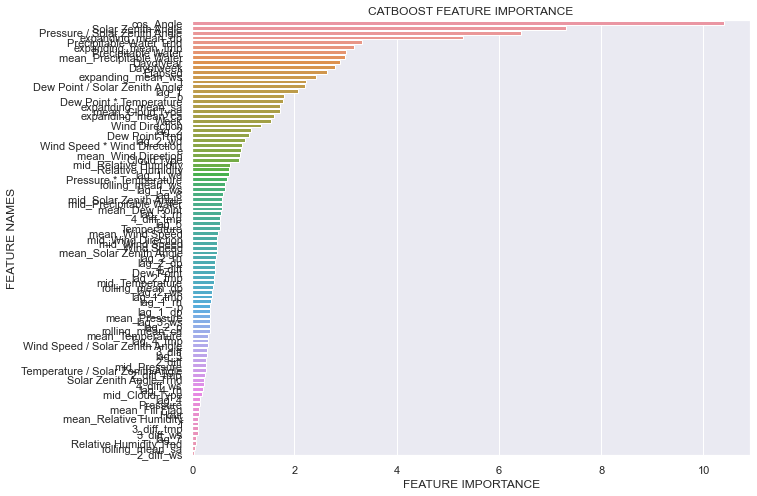

In [192]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X_train_dhi.columns,'CATBOOST')

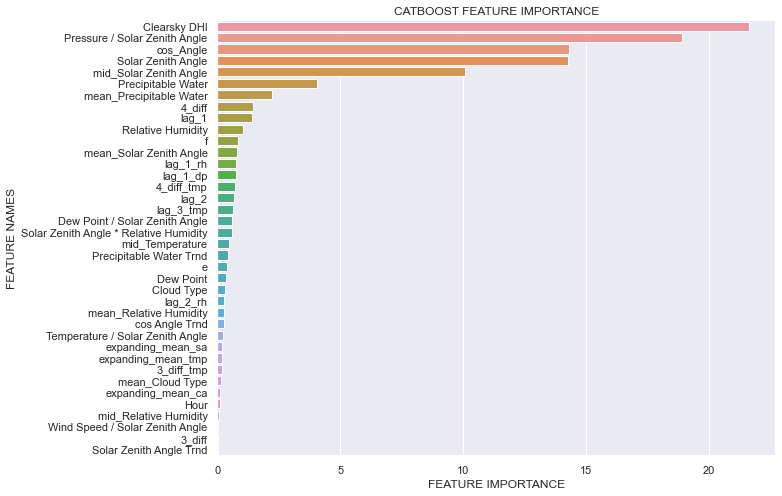

In [193]:
plot_feature_importance(model_dni.get_feature_importance(),X_train_dni.columns,'CATBOOST')

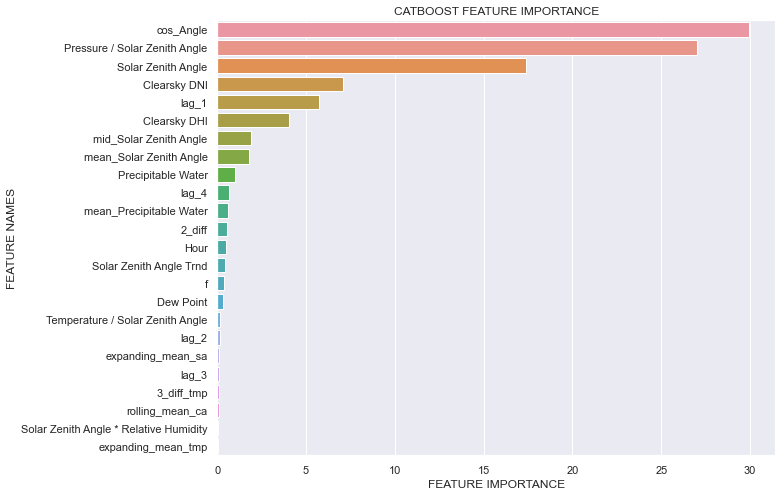

In [194]:
plot_feature_importance(model_ghi.get_feature_importance(),X_train_ghi.columns,'CATBOOST')

In [195]:
ts_test_dataset = cb.Pool(ts_test_1,)
pred_su = model.predict(ts_test_dataset)

In [206]:
ts_test_3.drop(['Clearsky DHI', 'Clearsky DNI'], axis=1, inplace=True)

In [207]:
ts_test_2.drop('Clearsky DHI', axis=1, inplace=True)

In [208]:
ts_out_1 = pd.DataFrame(pred_su, columns=['Clearsky DHI'])

In [209]:
#ts_test_2.columns

In [210]:
ts_test_2 = pd.concat([ts_test_2, ts_out_1], axis =1)

In [211]:
#ts_test_2.columns

In [202]:
ts_test_2 = ts_test_2[cols_dni]

In [203]:
ts_test_2.columns

Index(['Hour', 'Clearsky DHI', 'Clearsky DHI', 'Cloud Type', 'Dew Point',
       'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water',
       'mid_Temperature', 'mid_Relative Humidity', 'mid_Solar Zenith Angle',
       'mean_Cloud Type', 'mean_Relative Humidity', 'mean_Solar Zenith Angle',
       'mean_Precipitable Water', 'lag_1', 'lag_2', 'lag_3_tmp', 'lag_1_dp',
       'lag_1_rh', 'lag_2_rh', 'Solar Zenith Angle * Relative Humidity', 'e',
       'Solar Zenith Angle Trnd', 'Precipitable Water Trnd',
       'Pressure / Solar Zenith Angle', 'Temperature / Solar Zenith Angle',
       'cos_Angle', 'f', 'cos Angle Trnd', 'Dew Point / Solar Zenith Angle',
       'Wind Speed / Solar Zenith Angle', 'expanding_mean_ca',
       'expanding_mean_sa', 'expanding_mean_tmp', '3_diff', '4_diff',
       '3_diff_tmp', '4_diff_tmp'],
      dtype='object')

In [205]:
ts_test_dataset_dni = cb.Pool(ts_test_2,)
pred_dni = model_dni.predict(ts_test_dataset_dni)

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/features_layout.cpp:109: All feature names should be different, but 'Clearsky DHI' used more than once.

In [ ]:
pred_su

In [ ]:
pred_dni

In [ ]:
ts_out_2 = pd.DataFrame(pred_dni, columns=['Clearsky DNI'])

In [ ]:
#ts_test_3.head()

In [ ]:
ts_test_3 = pd.concat([ts_test_3, ts_out_1, ts_out_2], axis =1)

In [ ]:
ts_test_3 = ts_test_3[cols_ghi]

In [ ]:
#ts_test_3.drop(['Clearsky DHI', 'Clearsky DNI'], axis=1, inplace=True)

In [ ]:
ts_test_3.head()

In [ ]:
ts_test_dataset_ghi = cb.Pool(ts_test_3, )
pred_ghi = model_ghi.predict(ts_test_dataset_ghi)
ts_out_3 = pd.DataFrame(pred_ghi, columns=['Clearsky GHI'])

In [ ]:
ts_out_3

In [ ]:
df_out = pd.concat([ts_out_1, ts_out_2, ts_out_3], axis=1)
df_out

In [155]:
df_out.to_csv("out.csv", index=False)